## Final Project Submission

* Student name: Marvin Mills
* Student pace: part-time
* Scheduled project review date/time: 
* Instructor name: Yish Lim
* Blog post URL:


# Getting Started
To start, I'll import everything I see as necessary to get this done. I've imported the usual suspects -- pandas, numpy, matplotlib -- but also, I'll be importing "Time" to do API request rests as well as "Locale" and "FuncFormatter" which I'm hoping both will help with displaying currency on the visualizations.

Moreover, I'll be primarily, if not exclusively, using <b>TMDBSimple</b> to complete this research & recommendation for Microsoft. I've also gone ahead and found out how to call my API key without showing my API key here in the notebook. It also shouldn't show when I push to Github.

In [3]:
import emoji
print(emoji.emojize("Let's get started!!!" ":thumbs_up:"))

Let's get started!!!👍


In [4]:
#Importing all of the important items here
import pandas as pd
import numpy as np
import locale
import time
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tickie
import squarify
import seaborn as sns
from matplotlib.ticker import FuncFormatter
locale.setlocale( locale.LC_ALL, '' )

'English_United States.1252'

In [5]:
#Importing tmdbsimple as well as config so as to keep API Key hidden.
import tmdbsimple as tmdb
import config
tmdb.API_KEY = config.api_key

# Before The Work: Getting To Know The Data + Determining Approach

This first section -- below -- is where I get to know the nature of the data, while using tmdb simple. My goal is to determine what columns there are, and this will help me to decide on which questions I'd like to ask.

In [6]:
#Initial, manual accessing of the dataset per the "response" list found at: 
#https://developers.themoviedb.org/3/movies/get-movie-details

cool = 2
movie = tmdb.Movies(cool)
response = movie.info()

#These represent the diversity of information available for the movies in the database. There is more, of course.
print(movie.title)
print(movie.budget)
print(movie.revenue)
print(movie.release_date)
print(movie.runtime)
print(movie.genres)
print(movie.tagline)
print(movie.status)
print(movie.popularity)
print(movie.overview)

Ariel
0
0
1988-10-21
73
[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}]

Released
9.87
Taisto Kasurinen is a Finnish coal miner whose father has just committed suicide and who is framed for a crime he did not commit. In jail, he starts to dream about leaving the country and starting a new life. He escapes from prison but things don't go as planned...


## *** Accessing The Data ***
The good thing is that I can see clearly what the data looks like. But now, the goal is to figure out how to loop through the data to get this information for <b>1000 movies from the database</b>. I wonder whether I can loop through the data using the "movie.info()" method. When trying to loop through using <b>a range of numbers</b> there is a <b>404 Error</b> that comes up with some numbers. So, I'll need to find a better way.

In [21]:
#cooler = [900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916]
#Used the above to test what happens when looping through the dataset

#NOTE: It's 915 that breaks the code in "cooler" and brings up the 404 error.

#pop_1000_ids is a variable introduced in a cell below to make the code work.
#Prior to this, I was using the "cooler" variable to test the loop, as mentioned above.
#The id's from pop_1000_ids are taken from looping through the "movie.popular()" method (see below)

leggo_my_eggo = pop_1000_ids
shaquille = []
counter = 1

for i in leggo_my_eggo:
    if counter < 20:
        movie = tmdb.Movies(i)
        response = movie.info()
        shaquille.append(response)
        print(movie.title, movie.budget, movie.revenue)
        counter += 1

Project Power 0 0
Sputnik 0 0
Fearless 0 0
Deathstroke: Knights & Dragons - The Movie 0 0
The Secret Garden 0 0
Magic Camp 24000000 0
Scoob! 0 9430580
Joker 55000000 1074251311
Avengers: Infinity War 300000000 2046239637
Inception 160000000 825532764
Captain America: Civil War 250000000 1153296293
Work It 0 0
The Tax Collector 30000000 0
The Old Guard 70000000 0
Made in Italy 0 0
Tenet 205000000 0
Coma 4000000 2363584
Tesla 5000000 0
The King of Staten Island 0 0


## Iterating Through The Data: First Attempts

Now, let's use the "movie.popular()" method to loop through the Most Popular films from TMDB. In order to do this effectively, I'll be using "time.sleep" which will make the loop "rest" for a certain period so as not to access the API too quickly (I'm actually not sure whether my request is even considered "too much" but just in case I wanted to use the "time.sleep" option. I also see it as a good habit to form perhaps.

So, what I'll be doing here is:
<br>
<b>Loop through 50 pages of TMDB results, to get 1000 movies.</b>
<br>
I'll add the 1000 movies' info into a list (so it'll be a dictionary within a list), and then store the IDs and the Titles of the films into two different lists, respectively. I'll also check the length of the "popular_dict" list to verify whether there are 1000 entries.



In [7]:
print(type(tmdb.Movies()))

<class 'tmdbsimple.movies.Movies'>


In [8]:
a = tmdb.Movies()
abc = a.popular()

In [9]:
#I found some good insight and guidance for this here: 
#https://spandan-madan.github.io/DeepLearningProject/

popular_dict = []
pop_1000_ids = []
pop_1000_titles = []
for i in (range(1,51)):
    if i%15 == 0:
        time.sleep(7)
    doop = a.popular(page=i)['results']
    popular_dict.extend(doop)

print(doop[1]['title'])
print(popular_dict[1]['title'])
len(popular_dict)

Feel the Beat
Sputnik


1000

## Successfully Stored Movies Into List. What's Next?

Now, I'll check the data a bit to see what's inside. I'll also run a For Loop to add the Titles and the IDs to their own lists. What I'm hoping to do is to be able to use these to call data from the "movie.info()" method, instead of looping through the data from 0 to 20, for example.
<br>
<b>OK, let's check for what's inside, run the For Loop to store Titles and IDs, as well as verify these as well.</b>

In [10]:
popular_dict[0]

{'popularity': 274.992,
 'vote_count': 476,
 'video': False,
 'poster_path': '/bOKjzWDxiDkgEQznhzP4kdeAHNI.jpg',
 'id': 605116,
 'adult': False,
 'backdrop_path': '/qVygtf2vU15L2yKS4Ke44U4oMdD.jpg',
 'original_language': 'en',
 'original_title': 'Project Power',
 'genre_ids': [28, 80, 878],
 'title': 'Project Power',
 'vote_average': 6.7,
 'overview': 'An ex-soldier, a teen and a cop collide in New Orleans as they hunt for the source behind a dangerous new pill that grants users temporary superpowers.',
 'release_date': '2020-08-14'}

In [11]:
doop[0]

{'popularity': 17.66,
 'vote_count': 1109,
 'video': False,
 'poster_path': '/Ar1nT0XBXsenpwpwC4kvIUohLlX.jpg',
 'id': 208134,
 'adult': False,
 'backdrop_path': '/pY1t81Lo2ctRX0hGxPvwuFb7RF6.jpg',
 'original_language': 'en',
 'original_title': 'Jackass Presents: Bad Grandpa',
 'genre_ids': [35],
 'title': 'Jackass Presents: Bad Grandpa',
 'vote_average': 6,
 'overview': '86-year-old Irving Zisman is on a journey across America with the most unlikely companion: his 8 year-old grandson, Billy.',
 'release_date': '2013-10-22'}

In [12]:
#Looping through the dictionary created to append the IDs and Titles to lists.
for i in popular_dict:
    pop_1000_ids.append(i['id'])
    pop_1000_titles.append(i['title'])
print(pop_1000_ids[0:20])
print(pop_1000_titles[0:20])

[605116, 594718, 726664, 703771, 521034, 454433, 385103, 475557, 299536, 27205, 271110, 612706, 531499, 547016, 659991, 577922, 430155, 517412, 579583, 390635]
['Project Power', 'Sputnik', 'Fearless', 'Deathstroke: Knights & Dragons - The Movie', 'The Secret Garden', 'Magic Camp', 'Scoob!', 'Joker', 'Avengers: Infinity War', 'Inception', 'Captain America: Civil War', 'Work It', 'The Tax Collector', 'The Old Guard', 'Made in Italy', 'Tenet', 'Coma', 'Tesla', 'The King of Staten Island', "Fate/Stay Night: Heaven's Feel III. Spring Song"]


In [13]:
#Checking to see whether this ID matches with the ID above.
popular_dict[5]['id']

454433

## Turning List With Nested Dictionary Into a DataFrame

Now that I have the dictionary-organized data stored as a list (therefore as a dictionary within a list), I'll need to figure out how to create a DataFrame from this type of data (see below for the <b>type</b> of data the variable popular_dict stores as the first entry in the list). It's a <b>dictionary</b> as demonstrated below by checking the "type" of the dataset. So, what I'll do is use this data to create the main DataFrame I'll need.

In [14]:
print(type(popular_dict[0]))
print('---')
print(popular_dict[0].keys())
print('---')
print(popular_dict[0])

<class 'dict'>
---
dict_keys(['popularity', 'vote_count', 'video', 'poster_path', 'id', 'adult', 'backdrop_path', 'original_language', 'original_title', 'genre_ids', 'title', 'vote_average', 'overview', 'release_date'])
---
{'popularity': 274.992, 'vote_count': 476, 'video': False, 'poster_path': '/bOKjzWDxiDkgEQznhzP4kdeAHNI.jpg', 'id': 605116, 'adult': False, 'backdrop_path': '/qVygtf2vU15L2yKS4Ke44U4oMdD.jpg', 'original_language': 'en', 'original_title': 'Project Power', 'genre_ids': [28, 80, 878], 'title': 'Project Power', 'vote_average': 6.7, 'overview': 'An ex-soldier, a teen and a cop collide in New Orleans as they hunt for the source behind a dangerous new pill that grants users temporary superpowers.', 'release_date': '2020-08-14'}


In [15]:
#Just in case I need to set columns at some point perhaps this will come in handy?
main_film_dict_columns = list(popular_dict[0])
main_film_dict_columns

['popularity',
 'vote_count',
 'video',
 'poster_path',
 'id',
 'adult',
 'backdrop_path',
 'original_language',
 'original_title',
 'genre_ids',
 'title',
 'vote_average',
 'overview',
 'release_date']

## Creating The Main DataFrame

OK, now to create the DataFrame and check all of the data a bit. It was a lot simpler than I'd expected.

In [16]:
#Creating the DataFrame from the Dictionary formed in a previous cell.
main_movie_df = pd.DataFrame(popular_dict)
main_movie_df.tail()

popularity  vote_count  video                       poster_path     id  \
995      17.584         309  False  /61RknsRLF5YT1gIgSCVv4qbTt8C.jpg  10070   
996      17.580        5238  False  /7IYGiDrquvX3q7e9PV6Pejs6b2g.jpg   2502   
997      17.578        5500  False  /8tb3x0rYBGkgOTh1dCXPpmikp1V.jpg  27578   
998      17.578         859  False  /2sdmKtRz2SlGSLxxZDePKm5zxus.jpg  11358   
999      17.574        1519  False  /8cUIHYXpDFYX6r5ZviQuRKCVLJ2.jpg  12242   

     adult                     backdrop_path original_language  \
995  False  /fPcZY4N7tH0rtNmB6tFqZV8UN8M.jpg                en   
996  False  /fE7RqvVHbGHjBC9NjIjlLh2t4zK.jpg                en   
997  False  /gDRlw7GoA0OoLvijXNCTTdtAtNX.jpg                en   
998  False  /fnBW07T1FmCxrZDpRnlnMK3Urs3.jpg                en   
999  False  /f8BobrxGnAFObYRSN1BTIzQbEMW.jpg                en   

           original_title            genre_ids                 title  \
995                 Feast     [28, 35, 27, 53]                 Feast   
996  The Bourne Supremacy         [28, 18, 53]  The Bourne Supremacy   
997       The Expendables         [28, 12, 53]       The Expendables   
998          Walking Tall     [12, 18, 28, 53]          Walking Tall   
999              Mulan II  [28, 16, 35, 10751]              Mulan II   

     vote_average                                           overview  \
995           6.2  Patrons locked inside of a bar are forced to f...   
996           7.3  When a CIA operation to purchase classified Ru...   
997           6.1  Barney Ross leads a band of highly skilled mer...   
998           6.1  A former U.S. soldier returns to his hometown ...   
999           6.4  Fa Mulan gets the surprise of her young life w...   

    release_date  
995   2005-10-14  
996   2004-07-23  
997   2010-08-03  
998   2004-04-02  
999   2004-11-03

## Learning From Early Exploration of the Data & Creating DF Copy

It takes time to sift through datasets just right, but I'm glad to actually see this all in dictionary form. I'll be creating a copy of the dictionary as well, just in case.
<br>
<b>Why?</b> I want to be able to explore the DataFrame without concern for mixing something up and compromising my DataFrame.

In [17]:
main_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
popularity           1000 non-null float64
vote_count           1000 non-null int64
video                1000 non-null bool
poster_path          984 non-null object
id                   1000 non-null int64
adult                1000 non-null bool
backdrop_path        948 non-null object
original_language    1000 non-null object
original_title       1000 non-null object
genre_ids            1000 non-null object
title                1000 non-null object
vote_average         1000 non-null float64
overview             1000 non-null object
release_date         999 non-null object
dtypes: bool(2), float64(2), int64(2), object(8)
memory usage: 95.8+ KB


In [18]:
main_movie_df.keys()

Index(['popularity', 'vote_count', 'video', 'poster_path', 'id', 'adult',
       'backdrop_path', 'original_language', 'original_title', 'genre_ids',
       'title', 'vote_average', 'overview', 'release_date'],
      dtype='object')

In [19]:
copy_mmdf = main_movie_df

In [20]:
copy_mmdf

popularity  vote_count  video                       poster_path      id  \
0       274.992         476  False  /bOKjzWDxiDkgEQznhzP4kdeAHNI.jpg  605116   
1       130.557          31  False  /eAUzmhP54bE1vPXaY7FbuZREJlR.jpg  594718   
2       117.131          22  False  /5oQJ6HeNGWnEtP9Qyt5IZjuKI7j.jpg  726664   
3       105.509          92  False  /vFIHbiy55smzi50RmF8LQjmpGcx.jpg  703771   
4        86.814          91  False   /5MSDwUcqnGodFTvtlLiLKK0XKS.jpg  521034   
..          ...         ...    ...                               ...     ...   
995      17.584         309  False  /61RknsRLF5YT1gIgSCVv4qbTt8C.jpg   10070   
996      17.580        5238  False  /7IYGiDrquvX3q7e9PV6Pejs6b2g.jpg    2502   
997      17.578        5500  False  /8tb3x0rYBGkgOTh1dCXPpmikp1V.jpg   27578   
998      17.578         859  False  /2sdmKtRz2SlGSLxxZDePKm5zxus.jpg   11358   
999      17.574        1519  False  /8cUIHYXpDFYX6r5ZviQuRKCVLJ2.jpg   12242   

     adult                     backdrop_path original_language  \
0    False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg                en   
1    False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg                ru   
2    False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg                en   
3    False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg                en   
4    False  /8PK4X8U3C79ilzIjNTkTgjmc4js.jpg                en   
..     ...                               ...               ...   
995  False  /fPcZY4N7tH0rtNmB6tFqZV8UN8M.jpg                en   
996  False  /fE7RqvVHbGHjBC9NjIjlLh2t4zK.jpg                en   
997  False  /gDRlw7GoA0OoLvijXNCTTdtAtNX.jpg                en   
998  False  /fnBW07T1FmCxrZDpRnlnMK3Urs3.jpg                en   
999  False  /f8BobrxGnAFObYRSN1BTIzQbEMW.jpg                en   

                                 original_title            genre_ids  \
0                                 Project Power        [28, 80, 878]   
1                                       Спутник        [18, 27, 878]   
2                                      Fearless             [16, 35]   
3    Deathstroke: Knights & Dragons - The Movie             [28, 16]   
4                             The Secret Garden      [18, 14, 10751]   
..                                          ...                  ...   
995                                       Feast     [28, 35, 27, 53]   
996                        The Bourne Supremacy         [28, 18, 53]   
997                             The Expendables         [28, 12, 53]   
998                                Walking Tall     [12, 18, 28, 53]   
999                                    Mulan II  [28, 16, 35, 10751]   

                                          title  vote_average  \
0                                 Project Power           6.7   
1                                       Sputnik           6.2   
2                                      Fearless           6.8   
3    Deathstroke: Knights & Dragons - The Movie           6.8   
4                             The Secret Garden           7.3   
..                                          ...           ...   
995                                       Feast           6.2   
996                        The Bourne Supremacy           7.3   
997                             The Expendables           6.1   
998                                Walking Tall           6.1   
999                                    Mulan II           6.4   

                                              overview release_date  
0    An ex-soldier, a teen and a cop collide in New...   2020-08-14  
1    At the height of the Cold War, a Soviet spacec...   2020-07-14  
2    A teen gamer is forced to level up to full-tim...   2020-08-14  
3    Ten years ago, Slade Wilson-aka the super-assa...   2020-08-04  
4    Mary Lennox is born in India to wealthy Britis...   2020-07-08  
..                                                 ...          ...  
995  Patrons locked inside of a bar are forced to f...   2005-10-14  
996  When a CIA operation to purchase classif

#  🧗🏿 🌍 👨🏿‍🚀 My Questions:
OK! So, now it looks like I can start organizing, sorting and harnessing the data according to the questions I'd like to get answers for! 
<br><b>Here are the questions I'll be asking:</b>

<br> <b>First:</b> Which 20 production companies have been involved with the 100 top-earning films over the last 36 months, and in which genre are the respective films?

<br> <b>Second:</b> Is there a positive correlation between popularity and income in the last 36 months?

<br> <b>Third:</b> Which 10 non-English language films have the highest popularity score in the last 5 years?

<br> <b>Fourth:</b> How do films that belong to collections fare compared to films not apart of collections?


## <br> *** NOTE: A Word On Why I've Chosen These Questions ***
Upon doing initial research, I learned that, <i>"across all Hollywood studio movies, the average time between the first announcement and eventual release date is 871 days – or two years, four months and nineteen days."</i> What I also learned is that Comedy and Romance films have the shortest time from first announcement to eventual release. Understanding all of this, I think there could be value for Microsoft leadership in understanding first what <b>production companies'</b> activities have been, as related to <b>genre-specific investment</b> and <b>revenue generation.</b>
<br>
<br>
Moreover, <b>popularity</b> assumedly is a key factor in making this decision as well, and so I'll like to investigate which films are the most popular.
<br>
<br>
Lastly, to touch upon the existence of internationally-sourced films, I'll explore non-English language films, or films that have been wildly successful but whose original language is not English. <b>The assumption here is that internationally-sourced films that thrive in today's movie market have had either the investment, ingredients or both to generate "impressive" revenue,</b> and these films could be the types of films Microsoft leadership should consider if or when deciding to launch a movie studio segment. Also, I'll be investigating films with English as their original language and as well, with other languages spoken in the film.
<br>
<br>
Ultimately, the goal is to help Microsoft leadership understand <b>where money is flowing</b>, how popularity feedback provided online correlates to where money is flowing, and at the end, whether starting a movie studio segment makes sense and, <b>providing recommendation on the types of films to focus on.</b>

---

#    🧗🏿 🌍 👨🏿‍🚀  1st Question:
## Which 20 production companies have been involved with the 100 top-earning films over the last 36 months, and what's the most prevalent genre among these films?

So, now what I'll do is use my list of IDs I got from "movies.popular()" to pull data from "movies.info()". First, to get a look at the fuller amount of information available I'll look at the first entry. It's clear that there's a whole lot more information available per movie entry.

---

In [22]:

#Getting a look at the data for an entry once more.

leggo_my_eggo = pop_1000_ids
#counts = 1
shaqshaq = []

for j in leggo_my_eggo:
    movie = tmdb.Movies(j)
    response = movie.info()
    shaqshaq.append(response)
        
shaqshaq[0]

{'adult': False,
 'backdrop_path': '/qVygtf2vU15L2yKS4Ke44U4oMdD.jpg',
 'belongs_to_collection': None,
 'budget': 0,
 'genres': [{'id': 28, 'name': 'Action'},
  {'id': 80, 'name': 'Crime'},
  {'id': 878, 'name': 'Science Fiction'}],
 'homepage': 'http://www.netflix.com/projectpower',
 'id': 605116,
 'imdb_id': 'tt7550000',
 'original_language': 'en',
 'original_title': 'Project Power',
 'overview': 'An ex-soldier, a teen and a cop collide in New Orleans as they hunt for the source behind a dangerous new pill that grants users temporary superpowers.',
 'popularity': 274.992,
 'poster_path': '/bOKjzWDxiDkgEQznhzP4kdeAHNI.jpg',
 'production_companies': [{'id': 102118,
   'logo_path': None,
   'name': 'Screen Arcade',
   'origin_country': 'US'},
  {'id': 71895,
   'logo_path': None,
   'name': 'Supermarché',
   'origin_country': 'US'}],
 'production_countries': [{'iso_3166_1': 'US',
   'name': 'United States of America'}],
 'release_date': '2020-08-14',
 'revenue': 0,
 'runtime': 113,
 'sp

In [23]:
shaqshaq_col_names = list(shaqshaq[0].keys())
shaqshaq_df = pd.DataFrame(shaqshaq,columns=shaqshaq_col_names)
pd.set_option('display.max_columns',None)
shaqshaq_df.head()

adult                     backdrop_path belongs_to_collection  budget  \
0  False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg                  None       0   
1  False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg                  None       0   
2  False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg                  None       0   
3  False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg                  None       0   
4  False  /8PK4X8U3C79ilzIjNTkTgjmc4js.jpg                  None       0   

                                              genres  \
0  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
2  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
3  [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
4  [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...   

                                       homepage      id     imdb_id  \
0           http://www.netflix.com/projectpower  605116   tt7550000   
1  https://www.hypepro.tv/filmtv/video/sputnik1  594718  tt11905962   
2        https://www.netflix.com/title/81252403  726664   tt8675288   
3                                                703771  tt12876132   
4                                                521034   tt2702920   

  original_language                              original_title  \
0                en                               Project Power   
1                ru                                     Спутник   
2                en                                    Fearless   
3                en  Deathstroke: Knights & Dragons - The Movie   
4                en                           The Secret Garden   

                                            overview  popularity  \
0  An ex-soldier, a teen and a cop collide in New...     274.992   
1  At the height of the Cold War, a Soviet spacec...     130.557   
2  A teen gamer is forced to level up to full-tim...     117.131   
3  Ten years ago, Slade Wilson-aka the super-assa...     105.509   
4  Mary Lennox is born in India to wealthy Britis...      86.814   

                        poster_path  \
0  /bOKjzWDxiDkgEQznhzP4kdeAHNI.jpg   
1  /eAUzmhP54bE1vPXaY7FbuZREJlR.jpg   
2  /5oQJ6HeNGWnEtP9Qyt5IZjuKI7j.jpg   
3  /vFIHbiy55smzi50RmF8LQjmpGcx.jpg   
4   /5MSDwUcqnGodFTvtlLiLKK0XKS.jpg   

                                production_companies  \
0  [{'id': 102118, 'logo_path': None, 'name': 'Sc...   
1  [{'id': 100821, 'logo_path': None, 'name': 'Vo...   
2  [{'id': 81139, 'logo_path': None, 'name': 'Van...   
3  [{'id': 2785, 'logo_path': '/l5zW8jjmQOCx2dFmv...   
4  [{'id': 437, 'logo_path': '/nu20mtwbEIhUNnQ5NX...   

                                production_countries release_date  revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-14        0   
1           [{'iso_3166_1': 'RU', 'name': 'Russia'}]   2020-07-14        0   
2           [{'iso_3166_1': 'CA', 'name': 'Canada'}]   2020-08-14        0   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-04        0   
4  [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...   2020-07-08        0   

   runtime                                   spoken_languages    status  \
0    113.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
1    113.0           [{'iso_639_1': 'ru', 'name': 'Pусский'}]  Released   
2     89.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3     87.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
4     99.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  \
0  What would you risk for five minutes of pure p...   
1          The only survivor did not come back alone   
2                                                      
3  Never give a paid killer a reason to work for ...   
4                                                      

                                        title  video  vote_average  vote_count  
0                               Project Power  False        

## Colleting All Production Company Names Together

OK, now that I've taken a look, what I'd like to do next is see if I can collect all the production company names into one list. Moreover, since there's a pretty good chance production companies have worked on numerous if not many films on the list, I'll want to make sure I create a list with <b>unique</b> values.

In [24]:
loopr_pc = shaqshaq_df['production_companies']

#Loop through the production company column for all 1000 movies
#Loop through each production company entry for the length of each of the 1000 movies (# of companies varies)
#Appending the 'name' of each production company to a master list of production companies in the dataset
#Printing the first 10 entries in that list

prod_comp_names = []
cowntr = 1
for p in loopr_pc:
    for i in p:
        prod_comp_names.append(i['name'])
        cowntr += 1
            
pcn = set(prod_comp_names)
unique_prod_companies = list(pcn)
#Leveraging the 'cowntr' to cross-check with the lengh of the list, to verify that a list of unique values is being formed.
print(cowntr)
print('---')
print(len(unique_prod_companies))
print('---')
print(unique_prod_companies)

3462
---
1539
---
['Jason T. Reed Productions', 'WWE Studios', 'SD Entertainment', 'Ashton Productions', 'Culmination Productions', 'Rogue Marble', 'HBO', 'Imperative Entertainment', 'Penn Station Entertainment', 'Troma Entertainment', 'Shochiku Co., Ltd.', 'Justin Pictures', 'Twisted Media', 'Dragonfly Entertainment', 'Entertainment 360', 'Agatha Christie Limited', 'Smart Entertainment', 'Archipel 35', 'New Leaf Literary & Media', 'Nippon Television Network Corporation', 'Stardust Effects', 'A+E Studios', 'Mazur / Kaplan Company', 'Troll Court Entertainment', 'Novo Pictures', 'ufotable', 'The Department of Trade and Industry of South Africa', 'SCOPE Pictures', 'Atman Entertainment', 'Will Vinton Studios', 'Rideback', 'Paramount', 'Beagle Pug Films', 'Resonate Entertainment', 'Spyglass Entertainment', 'Slater Hall Pictures', 'Media Plus', 'Disney Channel', 'National Media Group', 'Shamley Productions', 'Québec Production Services Tax Credit', 'Patriot Pictures', 'Redwire Pictures', 'ME

### Creating Columns Using Unique Production Company Names

Now, here is where I'll add columns using the <i>unique_prod_companies</i> variable.

In [25]:
#Use the Unique Production Companies list to create new columns for the DataFrame.

for i in unique_prod_companies:
    shaqshaq_df[i] = 0

shaqshaq_df.head()

adult                     backdrop_path belongs_to_collection  budget  \
0  False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg                  None       0   
1  False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg                  None       0   
2  False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg                  None       0   
3  False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg                  None       0   
4  False  /8PK4X8U3C79ilzIjNTkTgjmc4js.jpg                  None       0   

                                              genres  \
0  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
2  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
3  [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
4  [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...   

                                       homepage      id     imdb_id  \
0           http://www.netflix.com/projectpower  605116   tt7550000   
1  https://www.hypepro.tv/filmtv/video/sputnik1  594718  tt11905962   
2        https://www.netflix.com/title/81252403  726664   tt8675288   
3                                                703771  tt12876132   
4                                                521034   tt2702920   

  original_language                              original_title  \
0                en                               Project Power   
1                ru                                     Спутник   
2                en                                    Fearless   
3                en  Deathstroke: Knights & Dragons - The Movie   
4                en                           The Secret Garden   

                                            overview  popularity  \
0  An ex-soldier, a teen and a cop collide in New...     274.992   
1  At the height of the Cold War, a Soviet spacec...     130.557   
2  A teen gamer is forced to level up to full-tim...     117.131   
3  Ten years ago, Slade Wilson-aka the super-assa...     105.509   
4  Mary Lennox is born in India to wealthy Britis...      86.814   

                        poster_path  \
0  /bOKjzWDxiDkgEQznhzP4kdeAHNI.jpg   
1  /eAUzmhP54bE1vPXaY7FbuZREJlR.jpg   
2  /5oQJ6HeNGWnEtP9Qyt5IZjuKI7j.jpg   
3  /vFIHbiy55smzi50RmF8LQjmpGcx.jpg   
4   /5MSDwUcqnGodFTvtlLiLKK0XKS.jpg   

                                production_companies  \
0  [{'id': 102118, 'logo_path': None, 'name': 'Sc...   
1  [{'id': 100821, 'logo_path': None, 'name': 'Vo...   
2  [{'id': 81139, 'logo_path': None, 'name': 'Van...   
3  [{'id': 2785, 'logo_path': '/l5zW8jjmQOCx2dFmv...   
4  [{'id': 437, 'logo_path': '/nu20mtwbEIhUNnQ5NX...   

                                production_countries release_date  revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-14        0   
1           [{'iso_3166_1': 'RU', 'name': 'Russia'}]   2020-07-14        0   
2           [{'iso_3166_1': 'CA', 'name': 'Canada'}]   2020-08-14        0   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-04        0   
4  [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...   2020-07-08        0   

   runtime                                   spoken_languages    status  \
0    113.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
1    113.0           [{'iso_639_1': 'ru', 'name': 'Pусский'}]  Released   
2     89.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3     87.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
4     99.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  \
0  What would you risk for five minutes of pure p...   
1          The only survivor did not come back alone   
2                                                      
3  Never give a paid killer a reason to work for ...   
4                                                      

                                        title  video  vote_average  \
0                               Project Power  False           6.8   
1

## A Different Approach: Explanation

After much trial and error I've decided to try this a different way. Instead, I'll use the function below which has a list comprehension included as well as a lambda/apply operation that I'll use. 

#### Reason? 

I was finding trouble changing the columns for each production company from "0" to "1", and so with another approach I've been able to successfully add in the production company names to the original DataFrame as well as account for whether each production company was involved with the respctive film.

With this, I'm looking to organize the data in such a way so that I can determine which production companies have been behind the highest and lowest grossing films in the last 24 months.

In [26]:
#Looping through the original DataFrame and comparing each production company name with the Unique Production Companies list.
#As well, creating a dictionary with filler data for each company 
#And then, updating the Value in the dictionary as each Company relates to the idividual movie.

def cool_func(row):
    counts = 0
    companies = [c['name'] for c in row['production_companies']]
    letsgo = {}
    
    for i in companies:
        letsgo[i] = 1
    for j in unique_prod_companies:        
        if j not in companies:
            letsgo[j] = 0
            
    return letsgo

In [27]:
#Now, to turn this into a DataFrame!

hmk = shaqshaq_df.apply(lambda r: cool_func(r), axis=1).to_list()
mo_counts = pd.DataFrame(hmk)
mo_counts

Screen Arcade  Supermarché  Jason T. Reed Productions  WWE Studios  \
0                1            1                          0            0   
1                0            0                          0            0   
2                0            0                          0            0   
3                0            0                          0            0   
4                0            0                          0            0   
..             ...          ...                        ...          ...   
995              0            0                          0            0   
996              0            0                          0            0   
997              0            0                          0            0   
998              0            0                          0            1   
999              0            0                          0            0   

     SD Entertainment  Ashton Productions  Culmination Productions  \
0                   0                   0                        0   
1                   0                   0                        0   
2                   0                   0                        0   
3                   0                   0                        0   
4                   0                   0                        0   
..                ...                 ...                      ...   
995                 0                   0                        0   
996                 0                   0                        0   
997                 0                   0                        0   
998                 0                   0                        0   
999                 1                   0                        0   

     Rogue Marble  HBO  Imperative Entertainment  Penn Station Entertainment  \
0               0    0                         0                           0   
1               0    0                         0                           0   
2               0    0                         0                           0   
3               0    0                         0                           0   
4               0    0                         0                           0   
..            ...  ...                       ...                         ...   
995             0    0                         0                           0   
996             0    0                         0                           0   
997             1    0                         0                           0   
998             0    0                         0                           0   
999             0    0                         0                           0   

     Troma Entertainment  Shochiku Co., Ltd.  Justin Pictures  Twisted Media  \
0                      0                   0                0              0   
1                      0                   0                0              0   
2                      0                   0                0              0   
3                      0                   0                0              0   
4                      0                   0                0              0   
..                   ...                 ...              ...            ...   
995                    0                   0                0              0   
996                    0                   0                0              0   
997                    0                   0                0              0   
998                    0                   0                0              0   
999                    0                   0                0              0   

     Dragonfly Entertainment  Entertainment 360  Agatha Christie Limited  \
0                          0                  0                        0   
1                          0                  0                        0   
2                          0                  0                        0   
3                          0         

In [28]:
newshaq = shaqshaq_df.drop(columns=unique_prod_companies)
newshaq

adult                     backdrop_path  \
0    False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg   
1    False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg   
2    False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg   
3    False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg   
4    False  /8PK4X8U3C79ilzIjNTkTgjmc4js.jpg   
..     ...                               ...   
995  False  /fPcZY4N7tH0rtNmB6tFqZV8UN8M.jpg   
996  False  /fE7RqvVHbGHjBC9NjIjlLh2t4zK.jpg   
997  False  /gDRlw7GoA0OoLvijXNCTTdtAtNX.jpg   
998  False  /fnBW07T1FmCxrZDpRnlnMK3Urs3.jpg   
999  False  /f8BobrxGnAFObYRSN1BTIzQbEMW.jpg   

                                 belongs_to_collection    budget  \
0                                                 None         0   
1                                                 None         0   
2                                                 None         0   
3                                                 None         0   
4                                                 None         0   
..                                                 ...       ...   
995  {'id': 98430, 'name': 'Feast Collection', 'pos...   3200000   
996  {'id': 31562, 'name': 'The Bourne Collection',...  75000000   
997  {'id': 126125, 'name': 'The Expendables Collec...  80000000   
998  {'id': 299748, 'name': 'Walking Tall (Reboot) ...  56000000   
999  {'id': 87236, 'name': 'Mulan Collection', 'pos...         0   

                                                genres  \
0    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1    [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
2    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
3    [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
4    [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...   
..                                                 ...   
995  [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...   
996  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
997  [{'id': 53, 'name': 'Thriller'}, {'id': 12, 'n...   
998  [{'id': 12, 'name': 'Adventure'}, {'id': 18, '...   
999  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   

                                             homepage      id     imdb_id  \
0                 http://www.netflix.com/projectpower  605116   tt7550000   
1        https://www.hypepro.tv/filmtv/video/sputnik1  594718  tt11905962   
2              https://www.netflix.com/title/81252403  726664   tt8675288   
3                                                      703771  tt12876132   
4                                                      521034   tt2702920   
..                                                ...     ...         ...   
995                       http://www.feast-movie.com/   10070   tt0426459   
996  https://www.uphe.com/movies/the-bourne-supremacy    2502   tt0372183   
997                   http://expendablesthemovie.com/   27578   tt1320253   
998                                                     11358   tt0351977   
999                                                     12242   tt0279967   

    original_language                              original_title  \
0                  en                               Project Power   
1                  ru                                     Спутник   
2                  en                                    Fearless   
3                  en  Deathstroke: Knights & Dragons - The Movie   
4                  en                           The Secret Garden   
..                ...                                         ...   
995                en                                       Feast   
996                en                        The Bourne Supremacy   
997                en                             The Expendables   
998                en                                Walking Tall   
999                en                                    Mulan II   

                                              overview  popularity  \
0    An ex-soldier, a teen and a cop collide in New...     274.992   
1    At the height o

## Before DataFrame Concatenation: Determine How To "Judge" Production Companies

Before adding the Production Companies' columns to the original DataFrame, I'm going to create a new column that shows the "cashflow success" of each film, meaning, I'd like to know which films have the best net income according to the numbers provided. Now, I've noticed some of the entries don't contain information related to "revenue" or "budget," so depending on how many don't, I may want to integrate another dataset (perhaps from IMDB?) to hopefully find some useful numbers. Otherwise, I'll just go with what's provide.

Also, some of the films will not have a "Revenue" because they haven't yet been released, and that's fine. I'll just exclude them if so.

Now, to get "Net Income" I'll take the "revenues" column and subtract it from the "budget" column, and then store the answer in a column called <b>net_income</b>.

And for the 36-month focus, I'll wait so as to effectively combine the two DataFrames later (the original one and the production companies DF)

In [29]:
#Using .loc to call the revenue and budget columns to create the new net income column
newshaq['gross_income'] = (newshaq.loc[:,'revenue'] - newshaq.loc[:,'budget'])
newshaq['gross_income'] = newshaq['gross_income'].astype('int64')
newshaq

adult                     backdrop_path  \
0    False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg   
1    False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg   
2    False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg   
3    False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg   
4    False  /8PK4X8U3C79ilzIjNTkTgjmc4js.jpg   
..     ...                               ...   
995  False  /fPcZY4N7tH0rtNmB6tFqZV8UN8M.jpg   
996  False  /fE7RqvVHbGHjBC9NjIjlLh2t4zK.jpg   
997  False  /gDRlw7GoA0OoLvijXNCTTdtAtNX.jpg   
998  False  /fnBW07T1FmCxrZDpRnlnMK3Urs3.jpg   
999  False  /f8BobrxGnAFObYRSN1BTIzQbEMW.jpg   

                                 belongs_to_collection    budget  \
0                                                 None         0   
1                                                 None         0   
2                                                 None         0   
3                                                 None         0   
4                                                 None         0   
..                                                 ...       ...   
995  {'id': 98430, 'name': 'Feast Collection', 'pos...   3200000   
996  {'id': 31562, 'name': 'The Bourne Collection',...  75000000   
997  {'id': 126125, 'name': 'The Expendables Collec...  80000000   
998  {'id': 299748, 'name': 'Walking Tall (Reboot) ...  56000000   
999  {'id': 87236, 'name': 'Mulan Collection', 'pos...         0   

                                                genres  \
0    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1    [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
2    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
3    [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
4    [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...   
..                                                 ...   
995  [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...   
996  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
997  [{'id': 53, 'name': 'Thriller'}, {'id': 12, 'n...   
998  [{'id': 12, 'name': 'Adventure'}, {'id': 18, '...   
999  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   

                                             homepage      id     imdb_id  \
0                 http://www.netflix.com/projectpower  605116   tt7550000   
1        https://www.hypepro.tv/filmtv/video/sputnik1  594718  tt11905962   
2              https://www.netflix.com/title/81252403  726664   tt8675288   
3                                                      703771  tt12876132   
4                                                      521034   tt2702920   
..                                                ...     ...         ...   
995                       http://www.feast-movie.com/   10070   tt0426459   
996  https://www.uphe.com/movies/the-bourne-supremacy    2502   tt0372183   
997                   http://expendablesthemovie.com/   27578   tt1320253   
998                                                     11358   tt0351977   
999                                                     12242   tt0279967   

    original_language                              original_title  \
0                  en                               Project Power   
1                  ru                                     Спутник   
2                  en                                    Fearless   
3                  en  Deathstroke: Knights & Dragons - The Movie   
4                  en                           The Secret Garden   
..                ...                                         ...   
995                en                                       Feast   
996                en                        The Bourne Supremacy   
997                en                             The Expendables   
998                en                                Walking Tall   
999                en                                    Mulan II   

                                              overview  popularity  \
0    An ex-soldier, a teen and a cop collide in New...     274.992   
1    At the height o

## Combining The Two DataFrames: SSDF + HMOK

Now, to combine the two DataFrames!

In [30]:
#And now, to attach this DataFrame with the original DataFrame shaqshaq.
grand_df = pd.concat([newshaq, mo_counts], axis=1)
grand_df

adult                     backdrop_path  \
0    False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg   
1    False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg   
2    False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg   
3    False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg   
4    False  /8PK4X8U3C79ilzIjNTkTgjmc4js.jpg   
..     ...                               ...   
995  False  /fPcZY4N7tH0rtNmB6tFqZV8UN8M.jpg   
996  False  /fE7RqvVHbGHjBC9NjIjlLh2t4zK.jpg   
997  False  /gDRlw7GoA0OoLvijXNCTTdtAtNX.jpg   
998  False  /fnBW07T1FmCxrZDpRnlnMK3Urs3.jpg   
999  False  /f8BobrxGnAFObYRSN1BTIzQbEMW.jpg   

                                 belongs_to_collection    budget  \
0                                                 None         0   
1                                                 None         0   
2                                                 None         0   
3                                                 None         0   
4                                                 None         0   
..                                                 ...       ...   
995  {'id': 98430, 'name': 'Feast Collection', 'pos...   3200000   
996  {'id': 31562, 'name': 'The Bourne Collection',...  75000000   
997  {'id': 126125, 'name': 'The Expendables Collec...  80000000   
998  {'id': 299748, 'name': 'Walking Tall (Reboot) ...  56000000   
999  {'id': 87236, 'name': 'Mulan Collection', 'pos...         0   

                                                genres  \
0    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1    [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
2    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
3    [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
4    [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...   
..                                                 ...   
995  [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...   
996  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
997  [{'id': 53, 'name': 'Thriller'}, {'id': 12, 'n...   
998  [{'id': 12, 'name': 'Adventure'}, {'id': 18, '...   
999  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   

                                             homepage      id     imdb_id  \
0                 http://www.netflix.com/projectpower  605116   tt7550000   
1        https://www.hypepro.tv/filmtv/video/sputnik1  594718  tt11905962   
2              https://www.netflix.com/title/81252403  726664   tt8675288   
3                                                      703771  tt12876132   
4                                                      521034   tt2702920   
..                                                ...     ...         ...   
995                       http://www.feast-movie.com/   10070   tt0426459   
996  https://www.uphe.com/movies/the-bourne-supremacy    2502   tt0372183   
997                   http://expendablesthemovie.com/   27578   tt1320253   
998                                                     11358   tt0351977   
999                                                     12242   tt0279967   

    original_language                              original_title  \
0                  en                               Project Power   
1                  ru                                     Спутник   
2                  en                                    Fearless   
3                  en  Deathstroke: Knights & Dragons - The Movie   
4                  en                           The Secret Garden   
..                ...                                         ...   
995                en                                       Feast   
996                en                        The Bourne Supremacy   
997                en                             The Expendables   
998                en                                Walking Tall   
999                en                                    Mulan II   

                                              overview  popularity  \
0    An ex-soldier, a teen and a cop collide in New...     274.992   
1    At the height o

In [31]:
#Now, to check the DataFrame again, to verify everything looks good.
grand_df.tail()

adult                     backdrop_path  \
995  False  /fPcZY4N7tH0rtNmB6tFqZV8UN8M.jpg   
996  False  /fE7RqvVHbGHjBC9NjIjlLh2t4zK.jpg   
997  False  /gDRlw7GoA0OoLvijXNCTTdtAtNX.jpg   
998  False  /fnBW07T1FmCxrZDpRnlnMK3Urs3.jpg   
999  False  /f8BobrxGnAFObYRSN1BTIzQbEMW.jpg   

                                 belongs_to_collection    budget  \
995  {'id': 98430, 'name': 'Feast Collection', 'pos...   3200000   
996  {'id': 31562, 'name': 'The Bourne Collection',...  75000000   
997  {'id': 126125, 'name': 'The Expendables Collec...  80000000   
998  {'id': 299748, 'name': 'Walking Tall (Reboot) ...  56000000   
999  {'id': 87236, 'name': 'Mulan Collection', 'pos...         0   

                                                genres  \
995  [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...   
996  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
997  [{'id': 53, 'name': 'Thriller'}, {'id': 12, 'n...   
998  [{'id': 12, 'name': 'Adventure'}, {'id': 18, '...   
999  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   

                                             homepage     id    imdb_id  \
995                       http://www.feast-movie.com/  10070  tt0426459   
996  https://www.uphe.com/movies/the-bourne-supremacy   2502  tt0372183   
997                   http://expendablesthemovie.com/  27578  tt1320253   
998                                                    11358  tt0351977   
999                                                    12242  tt0279967   

    original_language        original_title  \
995                en                 Feast   
996                en  The Bourne Supremacy   
997                en       The Expendables   
998                en          Walking Tall   
999                en              Mulan II   

                                              overview  popularity  \
995  Patrons locked inside of a bar are forced to f...      17.584   
996  When a CIA operation to purchase classified Ru...      17.580   
997  Barney Ross leads a band of highly skilled mer...      17.578   
998  A former U.S. soldier returns to his hometown ...      17.578   
999  Fa Mulan gets the surprise of her young life w...      17.574   

                          poster_path  \
995  /61RknsRLF5YT1gIgSCVv4qbTt8C.jpg   
996  /7IYGiDrquvX3q7e9PV6Pejs6b2g.jpg   
997  /8tb3x0rYBGkgOTh1dCXPpmikp1V.jpg   
998  /2sdmKtRz2SlGSLxxZDePKm5zxus.jpg   
999  /8cUIHYXpDFYX6r5ZviQuRKCVLJ2.jpg   

                                  production_companies  \
995  [{'id': 48688, 'logo_path': None, 'name': 'Mal...   
996  [{'id': 33, 'logo_path': '/8lvHyhjr8oUKOOy2dKX...   
997  [{'id': 7636, 'logo_path': '/e6uCvCNTf0nnery1i...   
998  [{'id': 13816, 'logo_path': None, 'name': 'Hyd...   
999  [{'id': 3475, 'logo_path': '/jTPNzDEn7eHmp3nEX...   

                                  production_countries release_date  \
995  [{'iso_3166_1': 'US', 'name': 'United States o...   2005-10-14   
996  [{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...   2004-07-23   
997  [{'iso_3166_1': 'US', 'name': 'United States o...   2010-08-03   
998  [{'iso_3166_1': 'US', 'name': 'United States o...   2004-04-02   
999  [{'iso_3166_1': 'US', 'name': 'United States o...   2004-11-03   

       revenue  runtime                                   spoken_languages  \
995     658573     95.0           [{'iso_639_1': 'en', 'name': 'English'}]   
996  288500217    108.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
997  274470394    103.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
998   57223890     86.0           [{'iso_639_1': 'en', 'name': 'English'}]   
999          0     79.0           [{'iso_639_1': 'en', 'name': 'English'}]   

       status                                    tagline  \
995  Released             They're Hungry. You're Dinner.   
996  Released           They should have left him alone.   
997  Released                        Choose Your Weapon.   
998  Released    One man will stand up for what's right.   
999  Releas

## Sorting Films

OK, now to get only the films released in the last 36 months.

<b>NOTE:</b> It's interesting to see the host of negative or zero numbers for the Net Income column, and this convinces me further that sorting the films according to release date could be helpful!

By looking at films released in the last 36 months, my goal is to focus on those films that perhaps have <b>gone through a release cycle of marketing campaigns and promotion</b> and have been released in the midst of the trend where moviegoers prefer enjoying films online to visiting theaters.

In [32]:
#First, to ensure the "release_date" column is in date format:

grand_df['release_date'] = pd.to_datetime(grand_df['release_date'])

#Now, to choose the start and end dates:

start_date = '01-01-2017'
end_date = '12-31-2019'

In [33]:
#Now, to filter according to these dates:

date_filter = (grand_df['release_date'] > start_date) & (grand_df['release_date'] <= end_date)
grand_df = grand_df.loc[date_filter]
grand_df

adult                     backdrop_path  \
7    False  /n6bUvigpRFqSwmPp1m2YADdbRBc.jpg   
8    False  /bOGkgRGdhrBYJSLpXaxhXVstddV.jpg   
16   False  /8HbqSozBJxv6UldR9lMUECUlbLI.jpg   
22   False  /5myQbDzw3l8K9yofUXRJ4UTVgam.jpg   
23   False  /ApiBzeaa95TNYliSbQ8pJv4Fje7.jpg   
..     ...                               ...   
973  False  /yRXzrwLfB5tDTIA3lSU9S3N9RUK.jpg   
976  False  /pMREHTtqq5LZ797q127A9NZEfsN.jpg   
977  False  /k7sE3loFwuU2mqf7FbZBeE3rjBa.jpg   
982  False  /7Cp11vte6kD5vlYMfrbD2MHvTak.jpg   
988  False  /sega8RtajHVT8JbbdoYBAbikaXj.jpg   

                                 belongs_to_collection     budget  \
7                                                 None   55000000   
8    {'id': 86311, 'name': 'The Avengers Collection...  300000000   
16                                                None    4000000   
22   {'id': 531241, 'name': 'Spider-Man (Avengers) ...  160000000   
23                                                None   11363000   
..                                                 ...        ...   
973                                               None   28000000   
976                                               None          0   
977  {'id': 531315, 'name': 'The Angry Birds Collec...   65000000   
982                                               None          0   
988                                               None    9831962   

                                                genres  \
7    [{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...   
8    [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
16   [{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...   
22   [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
23   [{'id': 35, 'name': 'Comedy'}, {'id': 53, 'nam...   
..                                                 ...   
973  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
976                     [{'id': 28, 'name': 'Action'}]   
977  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
982  [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...   
988  [{'id': 27, 'name': 'Horror'}, {'id': 14, 'nam...   

                                              homepage      id    imdb_id  \
7                           http://www.jokermovie.net/  475557  tt7286456   
8    https://www.marvel.com/movies/avengers-infinit...  299536  tt4154756   
16                                                      430155  tt6087226   
22   https://www.marvel.com/movies/spider-man-far-f...  429617  tt6320628   
23                     https://www.parasite-movie.com/  496243  tt6751668   
..                                                 ...     ...        ...   
973                         http://www.tagthemovie.com  455980  tt2854926   
976                                                     534490  tt8836988   
977  https://sites.sonypictures.com/angrybirds/site...  454640  tt6095472   
982  https://www.transmissionfilms.com.au/films/the...  400090  tt4068576   
988                       http://coldskinthemovie.com/  428399  tt1034385   

    original_language             original_title  \
7                  en                      Joker   
8                  en     Avengers: Infinity War   
16                 ru                       Кома   
22                 en  Spider-Man: Far from Home   
23                 ko                        기생충   
..                ...                        ...   
973                en                        Tag   
976                en                 Avengement   
977                en    The Angry Birds Movie 2   
982                en            The Nightingale   
988                en                  Cold Skin   

                                              overview  popularity  \
7    During the 1980s, a failed stand-up comedian i...      80.757   
8    As the Avengers and their allies have continue...      77.294   
16   A young and talented architect comes to his se...      59.127   
22   Peter Parker and his friends go on a summer tr...      54.179   
23

In [34]:
#OK, now to order the dataframe according to Net Income

grand_df = grand_df.sort_values(by = ['gross_income'], ascending=False)
grand_df.head()

adult                     backdrop_path  \
81  False  /orjiB3oUIsyz60hoEqkiGpy5CeO.jpg   
8   False  /bOGkgRGdhrBYJSLpXaxhXVstddV.jpg   
84  False  /nRXO2SnOA75OsWhNhXstHB8ZmI3.jpg   
46  False  /xJWPZIYOEFIjZpBL7SVBGnzRYXp.jpg   
85  False  /6ELJEzQJ3Y45HczvreC3dg0GV5R.jpg   

                                belongs_to_collection     budget  \
81  {'id': 86311, 'name': 'The Avengers Collection...  356000000   
8   {'id': 86311, 'name': 'The Avengers Collection...  300000000   
84                                               None  260000000   
46  {'id': 386382, 'name': 'Frozen Collection', 'p...  150000000   
85                                               None  200000000   

                                               genres  \
81  [{'id': 12, 'name': 'Adventure'}, {'id': 878, ...   
8   [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
84  [{'id': 12, 'name': 'Adventure'}, {'id': 10751...   
46  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
85  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   

                                             homepage      id    imdb_id  \
81     https://www.marvel.com/movies/avengers-endgame  299534  tt4154796   
8   https://www.marvel.com/movies/avengers-infinit...  299536  tt4154756   
84       https://movies.disney.com/the-lion-king-2019  420818  tt6105098   
46                 https://movies.disney.com/frozen-2  330457  tt4520988   
85  https://marvel.com/movies/movie/224/black_panther  284054  tt1825683   

   original_language          original_title  \
81                en       Avengers: Endgame   
8                 en  Avengers: Infinity War   
84                en           The Lion King   
46                en               Frozen II   
85                en           Black Panther   

                                             overview  popularity  \
81  After the devastating events of Avengers: Infi...      36.351   
8   As the Avengers and their allies have continue...      77.294   
84  Simba idolizes his father, King Mufasa, and ta...      36.033   
46  Elsa, Anna, Kristoff and Olaf head far into th...      42.963   
85  King T'Challa returns home from America to the...      35.669   

                         poster_path  \
81  /or06FN3Dka5tukK1e9sl16pB3iy.jpg   
8   /7WsyChQLEftFiDOVTGkv3hFpyyt.jpg   
84  /dzBtMocZuJbjLOXvrl4zGYigDzh.jpg   
46  /pjeMs3yqRmFL3giJy4PMXWZTTPa.jpg   
85  /uxzzxijgPIY7slzFvMotPv8wjKA.jpg   

                                 production_companies  \
81  [{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...   
8   [{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...   
84  [{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...   
46  [{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...   
85  [{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...   

                                 production_countries release_date  \
81  [{'iso_3166_1': 'US', 'name': 'United States o...   2019-04-24   
8   [{'iso_3166_1': 'US', 'name': 'United States o...   2018-04-25   
84  [{'iso_3166_1': 'US', 'name': 'United States o...   2019-07-12   
46  [{'iso_3166_1': 'US', 'name': 'United States o...   2019-11-20   
85  [{'iso_3166_1': 'US', 'name': 'United States o...   2018-02-13   

       revenue  runtime                                   spoken_languages  \
81  2797800564    181.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
8   2046239637    149.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
84  1656943394    118.0           [{'iso_639_1': 'en', 'name': 'English'}]   
46  1450026933    104.0           [{'iso_639_1': 'en', 'name': 'English'}]   
85  1346739107    134.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   

      status                                tagline                   title  \
81  Released        Part of the journey is the end.       Avengers: Endgame   
8   Released  An entire universe. Once and for all.  Avengers: Infinity War   
84  Released                 The King has Returned.           The Lion King   
46  Released      

In [35]:
#Getting a list of the specific production companies involved in the top-earning films in the last 36 months
#I've found it useful to have just in case.

grand_df_cols = list(grand_df.columns.values)
company_shortlist_cols = grand_df_cols[26:]
company_shortlist_cols

['Screen Arcade',
 'Supermarché',
 'Jason T. Reed Productions',
 'WWE Studios',
 'SD Entertainment',
 'Ashton Productions',
 'Culmination Productions',
 'Rogue Marble',
 'HBO',
 'Imperative Entertainment',
 'Penn Station Entertainment',
 'Troma Entertainment',
 'Shochiku Co., Ltd.',
 'Justin Pictures',
 'Twisted Media',
 'Dragonfly Entertainment',
 'Entertainment 360',
 'Agatha Christie Limited',
 'Smart Entertainment',
 'Archipel 35',
 'New Leaf Literary & Media',
 'Nippon Television Network Corporation',
 'Stardust Effects',
 'A+E Studios',
 'Mazur / Kaplan Company',
 'Troll Court Entertainment',
 'Novo Pictures',
 'ufotable',
 'The Department of Trade and Industry of South Africa',
 'SCOPE Pictures',
 'Atman Entertainment',
 'Will Vinton Studios',
 'Rideback',
 'Paramount',
 'Beagle Pug Films',
 'Resonate Entertainment',
 'Spyglass Entertainment',
 'Slater Hall Pictures',
 'Media Plus',
 'Disney Channel',
 'National Media Group',
 'Shamley Productions',
 'Québec Production Services 

### Preparing DataFrame To Use For Visualization

Since I will want to create visualizaitons, I'll need to isolate the data needed for it from the other data in the dataframe. So, I'll start by using pretty much the same approach as when I needed to tally the production companies involved with each film.

In [36]:
#Now, to create a dictionary where the loop will store the results once I've looped through the shortlist above.
company_gross_dict = {}
for c in company_shortlist_cols:
    #filter dataframe for only films that are backed by production companies in the list
    grander_df = grand_df[grand_df[c] == 1]
    company_gross_dict[c] = grander_df['gross_income'].sum()

In [37]:
#Now, to create the DataFrame.
company_total_gross = pd.DataFrame(list(company_gross_dict.items()),columns=
             ['production_companies','total_gross_income']).sort_values(by='total_gross_income',ascending=False)
ctn = company_total_gross.iloc[:20,:].set_index('production_companies')
ctn

total_gross_income
production_companies                       
Walt Disney Pictures            11509935872
Marvel Studios                   9808556338
Warner Bros. Pictures            7123892557
Universal Pictures               5108695080
Columbia Pictures                4320377544
20th Century Fox                 4048665135
Sony Pictures                    3958780060
DC Films                         3322017696
DC Entertainment                 3322017696
DC Comics                        3322017696
Pascal Pictures                  2845355211
Pixar                            2775651243
TSG Entertainment                2729358666
Perfect World Pictures           2380602895
Legendary Entertainment          2322130453
Marvel Entertainment             2230566608
Seven Bucks Productions          2205828066
The Safran Company               2108313672
Lucasfilm Ltd.                   2099636510
Paramount                        2061721017

### Using FuncFormatter

OK, now that I have that, I'd like to use FuncFormatter to display the numbers in a more friendly way on the visualization.

In [38]:
#Got this from https://dfrieds.com/data-visualizations/how-format-large-tick-values.html
#So that I can display x-ticks in a nice,clean dollar format!

def reformat_money(tick_val, pos):
    
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '${:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '${:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '${:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

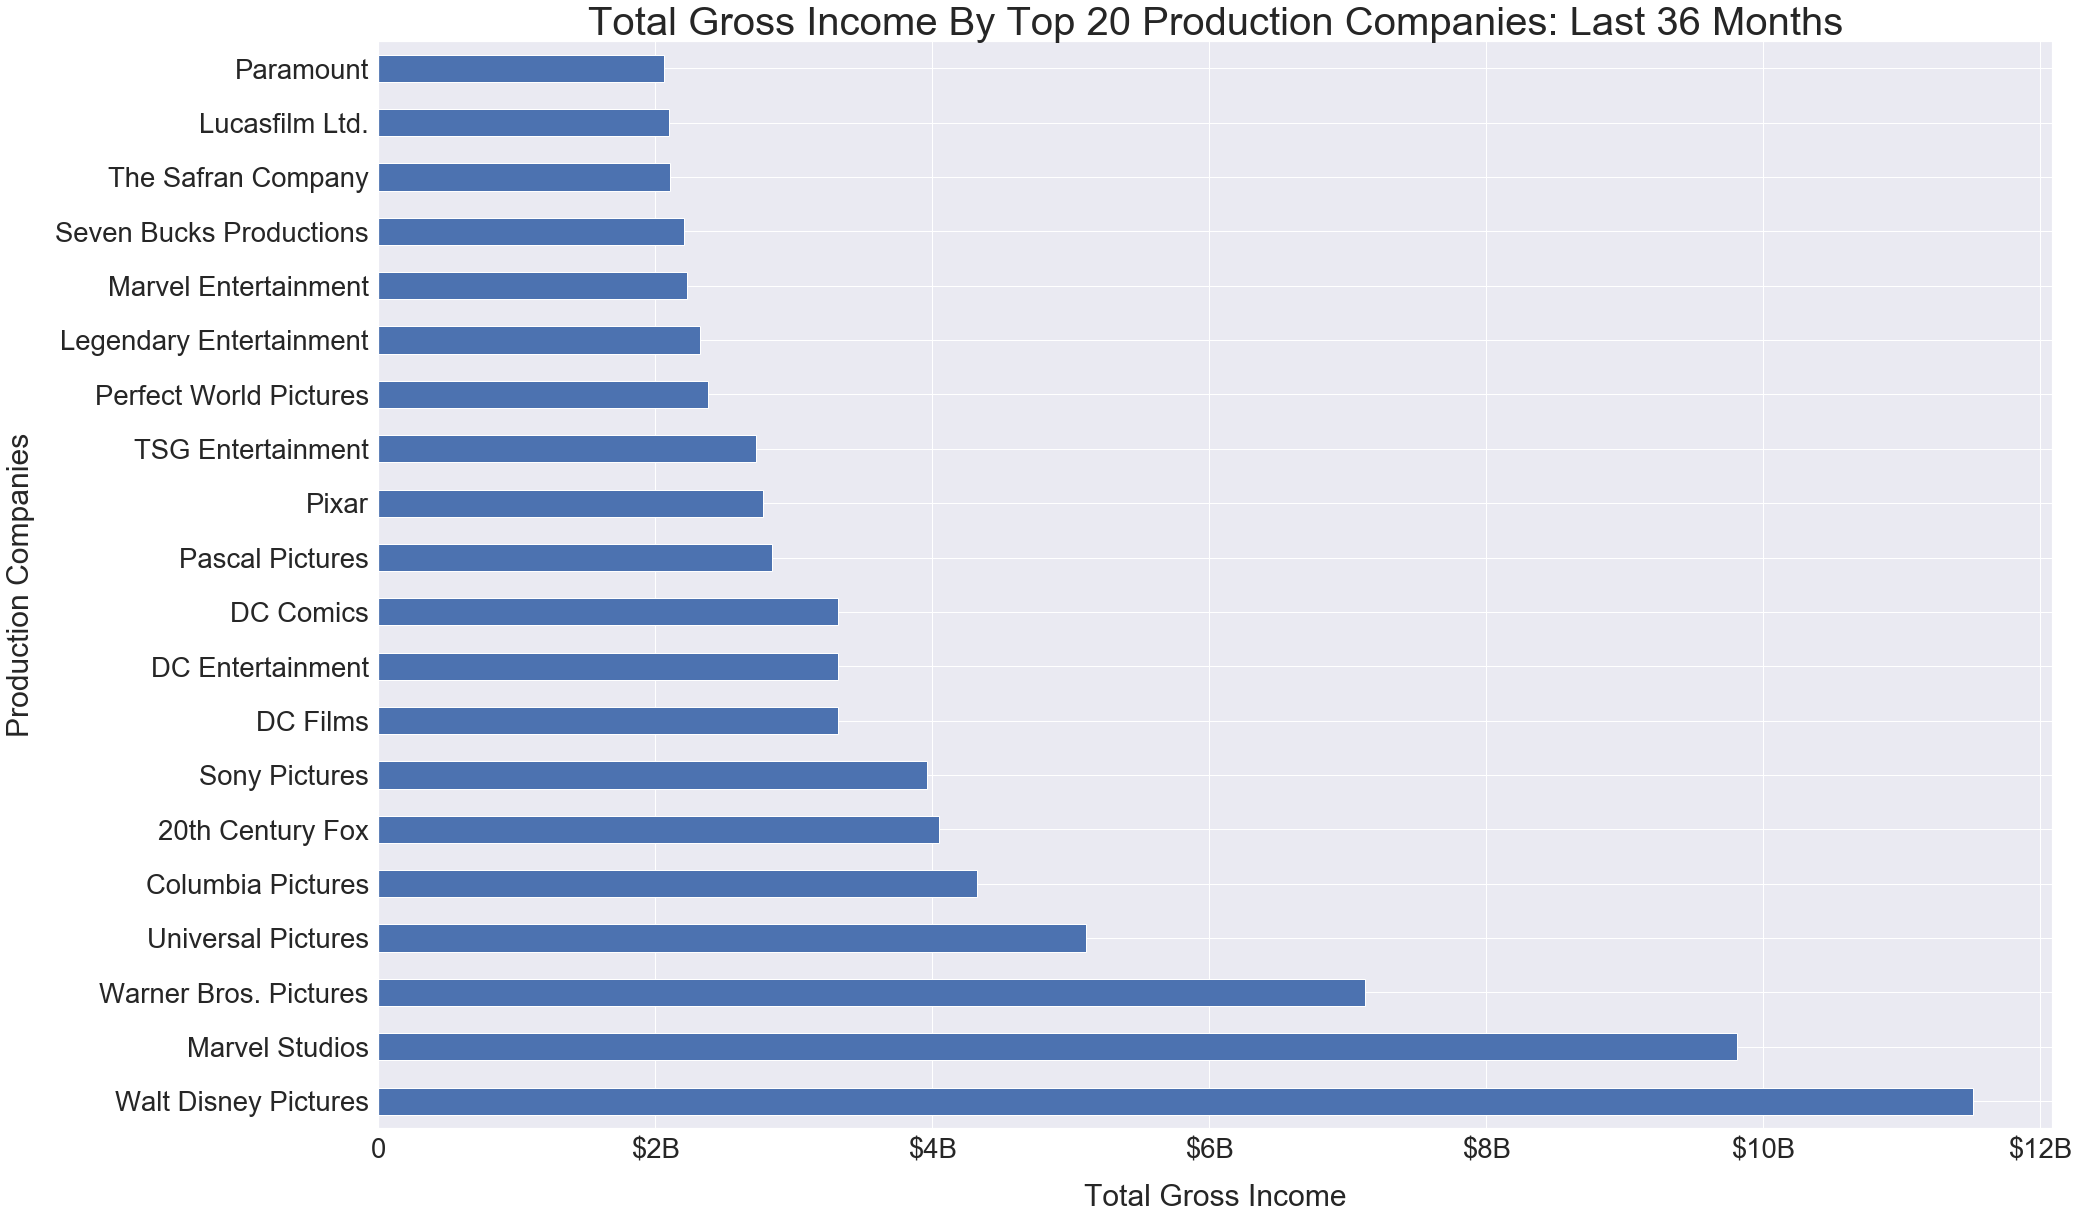

In [40]:
#Creating the visualization using Seaborn

fig,ax = plt.subplots()
sns.set(font_scale=2.3)
ctn.plot(kind='barh',figsize=(30,20),ax=ax)
plt.xlabel('Total Gross Income',labelpad=20)
plt.ylabel('Production Companies',labelpad=20)
plt.title('Total Gross Income By Top 20 Production Companies: Last 36 Months', y=1.0, fontsize=40)

#Removing the legend as I think it's unnecessary in this situation.
ax.legend().set_visible(False)
ax.xaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

plt.show()

## Now: In Which Genres Are These Films?

Now, I'd like to investigate which genres are most prevalent within the top-earning films, so as to combine with these insights showing the production companies that have been involved wit these "most successful" films in the last 3 years.

One thing the above chart reveals which is important: top, well-known major studios are not just blowing through capital, they appear to be profitable. Moreover, and perhaps to be expected: the production companies connected with the highest net income from the respective films are a cut above the rest.

It would be valuable to investigate the specific focus of these companies. It <i>appears that</i> films in the areas of comic book, Disney and Pixar <i>characters</i> could be prevalent on the list, but let's dig in more.

In [41]:
#Leveraging a list comprehension as before inside of a function to loop through the dataframe effectively.

def cool_func_genres(row):

    genres = [c['name'] for c in row['genres']]
    letsgo = {}
    genres_list = []
    
    for i in genres:
        letsgo[i] = 1
        genres_list.append(i)
        unique_genres_list = set(genres_list)
        #Just in case I need this later, creating a list of unique genres
        ugl = list(unique_genres_list)
            
    return letsgo

In [42]:
#Now, to use the Apply method to run the Function above, so as to populate the DataFrame.
genre_top_dict = grand_df.apply(lambda r: cool_func_genres(r), axis=1).to_list()
genre_top_dict

[{'Adventure': 1, 'Science Fiction': 1, 'Action': 1},
 {'Adventure': 1, 'Action': 1, 'Science Fiction': 1},
 {'Adventure': 1, 'Family': 1, 'Music': 1},
 {'Animation': 1, 'Family': 1, 'Adventure': 1},
 {'Action': 1, 'Adventure': 1, 'Fantasy': 1, 'Science Fiction': 1},
 {'Action': 1, 'Adventure': 1, 'Science Fiction': 1},
 {'Science Fiction': 1, 'Action': 1, 'Adventure': 1},
 {'Family': 1, 'Fantasy': 1, 'Romance': 1},
 {'Action': 1, 'Adventure': 1, 'Animation': 1, 'Family': 1},
 {'Crime': 1, 'Thriller': 1, 'Drama': 1},
 {'Action': 1, 'Adventure': 1, 'Fantasy': 1},
 {'Action': 1, 'Adventure': 1, 'Science Fiction': 1},
 {'Action': 1, 'Adventure': 1, 'Science Fiction': 1},
 {'Adventure': 1, 'Animation': 1, 'Comedy': 1, 'Family': 1, 'Fantasy': 1},
 {'Action': 1, 'Adventure': 1, 'Comedy': 1, 'Fantasy': 1},
 {'Adventure': 1, 'Fantasy': 1, 'Romance': 1, 'Family': 1},
 {'Drama': 1, 'Music': 1},
 {'Action': 1, 'Adventure': 1, 'Science Fiction': 1},
 {'Science Fiction': 1, 'Action': 1},
 {'Action'

In [43]:
#Now, I'll tally up the number of times each genre is mentioned within the last 36 months' top-earning film list.
genre_top_tot = pd.DataFrame(genre_top_dict).sum().sort_values(ascending=False)
genre_top_tot

Drama              101.0
Action              90.0
Thriller            77.0
Adventure           75.0
Comedy              68.0
Science Fiction     55.0
Fantasy             44.0
Horror              40.0
Crime               30.0
Family              29.0
Romance             27.0
Animation           25.0
Mystery             24.0
History             13.0
Music                7.0
War                  7.0
TV Movie             1.0
dtype: float64

### Action, Drama + Thrillers FTW

Clearly, action and drama films are the most present in this list. Could going (mostly) all in on these two genres be the secret sauce to successful movie production? Although there are more aspects to consider to be sure, we can see that as it relates to the most income-positive films released in the last 36 months, action and drama take the cake.

OK, now to create a nice visualization. I'll use a variation of a Treemap I discovered.

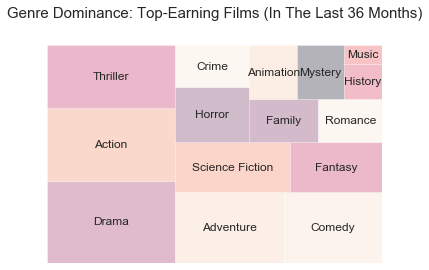

In [44]:
# Guidance obtained from these sources -- https://github.com/laserson/squarify 
#and https://python-graph-gallery.com/treemap/

x = 0
y = 0
width = 2000
height = 1250

#Removed the last 3 values in the dataframe to create well-organized visualization.
top_genre_viz = squarify.normalize_sizes(genre_top_tot.iloc[:15],width,height)
squarify.plot(sizes=top_genre_viz, label=genre_top_tot.index, alpha=.3, text_kwargs={'fontsize':12})

plt.title('Genre Dominance: Top-Earning Films (In The Last 36 Months)', y=1.1, fontsize=15)
plt.axis('off')
plt.show()

## Takeaway Update #1: Choose Action, Drama + Thriller Films With Confidence

The "Action" and "Drama" categories clearly stand out as it relates to films released in the last 36 months, and <i>investing</i> in producing these types of films seems to be a path worth exploring.

I thought that maybe <i>Animation</i> films would be higher with Walt Disney Studios being the top-earner (and it's worth delving deeper into which genre category Walt Disney specifically focuses on most, but the data does show that action films are most prevalent among the top-earners in the last 36 months!

---

##  🧗🏿 🌍 👨🏿‍🚀 Second Question:

## Is there a positive correlation between popularity and income in the last 36 months?

Now, my next goal is related to popularity and income. Without knowing <i>exactly</i> how each production company calculates its profits of course, the "net_income" column is what I've decided to use as a way to get a baseline sense. 

Since I've already done some cleaning for the last question related to net income, I'll review whether I can use some of the same code to find out more about the films with (arguably) the worst financial performance of the last 36 months, and whether these correlate to popularity scores.

I'll check on the entire list of films as well, to compare with the bottom-earners insights.

In [45]:
#Simple grouping that shows the net income for films released in the last 36 months.

simpl = grand_df.loc[:,['title','popularity','gross_income']].sort_values(by=['gross_income'],ascending=True)
simpl_for_plot = simpl.iloc[:100,:]
simpl_for_plot

title  popularity  gross_income
802     Mowgli: Legend of the Jungle      18.686    -175000000
257                     The Irishman      26.647    -151000000
341                    6 Underground      24.227    -150000000
661                           Bright      19.901     -90000000
912                             Okja      18.011     -50000000
..                               ...         ...           ...
689                     Midnight Sun      19.577      27365467
905          What Happened to Monday      18.038      27975429
631          Fighting with My Family      20.185      28055536
266  My Hero Academia: Heroes Rising      26.276      29900850
554                        First Man      20.799      30546153

[100 rows x 3 columns]

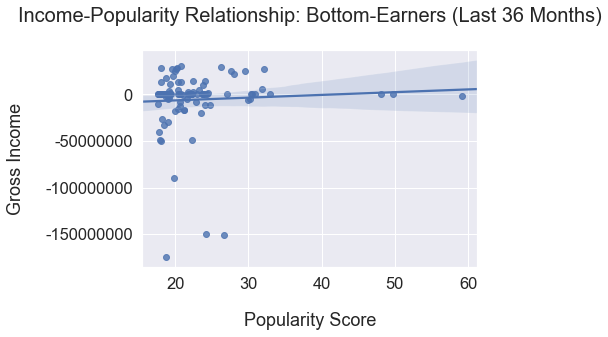

In [46]:
pop_net_neg = simpl_for_plot
sns.set(font_scale=1.5)
fig,ax = plt.subplots()
# use the function regplot to make a scatterplot
sns.regplot(x=pop_net_neg["popularity"], y=pop_net_neg["gross_income"], ax=ax, marker='o')

plt.xlabel('Popularity Score',labelpad=20)
plt.ylabel('Gross Income',labelpad=20)
plt.title('Income-Popularity Relationship: Bottom-Earners (Last 36 Months)', y=1.1, fontsize=20)

#Removing the legend as I think it's unnecessary in this situation.
#ax.legend().set_visible(False)
ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

plt.show()

## As Income Goes (Down) So Does Popularity?

OK! So, it seems that poplularity score and income have a positive correlation, at least with respect to films released in the last 36 months. However, to further cement the correlation, we would need to see a similar positive correlation with the top-earning films as well. Let's take a look.

In [47]:
#Reversing the sorting from the previous simpl variable

simpl_top = grand_df.loc[:,['title','popularity','gross_income']].sort_values(by=['gross_income'],ascending=False)
simpl_top.head(20)

title  popularity  gross_income
81                  Avengers: Endgame      36.351    2441800564
8              Avengers: Infinity War      77.294    1746239637
84                      The Lion King      36.033    1396943394
46                          Frozen II      42.963    1300026933
85                      Black Panther      35.669    1146739107
218    Jurassic World: Fallen Kingdom      27.846    1133459585
112          Star Wars: The Last Jedi      32.852    1132539889
432              Beauty and the Beast      22.663    1103521126
407                     Incredibles 2      23.065    1042805359
7                               Joker      80.757    1019251311
236                           Aquaman      27.278     988461807
63                     Captain Marvel      39.163     976274794
22          Spider-Man: Far from Home      54.179     971927996
368                       Toy Story 4      23.779     898394593
904    Jumanji: Welcome to the Jungle      18.045     872102237
91                            Aladdin      34.758     864612394
185                 Bohemian Rhapsody      28.983     842027543
59   Star Wars: The Rise of Skywalker      40.796     824144248
88                              Venom      35.239     739013954
39             Spider-Man: Homecoming      44.776     705166924

[Text(0, 0.5, '')]

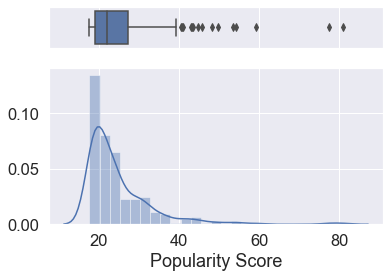

In [48]:
f, (xax_box, xax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .95)})
 
# Add a graph in each part
sns.boxplot(simpl_top["popularity"], ax=xax_box)
sns.distplot(simpl_top["popularity"], ax=xax_hist)
 
# Remove x axis name for the boxplot
xax_box.set(xlabel='')
xax_hist.set(xlabel='Popularity Score')
xax_hist.set(ylabel='')

## High Popularity Scores Are Rare, And That's Good For Business

Here we see that very few films have a popularity score of 50 or higher. But, of course this doesn't mean the film wasn't popular. However, what's more important perhaps is that the data shows something else!

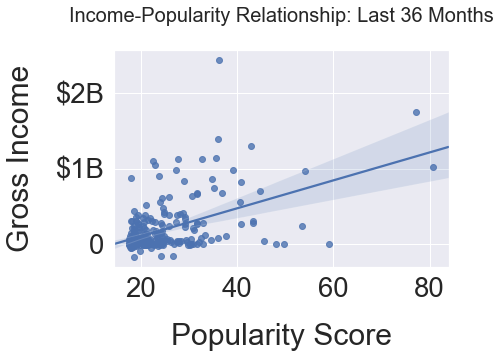

In [49]:
#Now, time to create the second scatterplot.

pop_net_pos = simpl_top
sns.set(font_scale=2.5)
fig,ax = plt.subplots()
# use the function regplot to make a scatterplot
sns.regplot(x=pop_net_pos["popularity"], y=pop_net_pos["gross_income"], ax=ax, marker='o')

plt.xlabel('Popularity Score',labelpad=20)
plt.ylabel('Gross Income',labelpad=20)
plt.title('Income-Popularity Relationship: Last 36 Months', y=1.1, fontsize=20)

#Removing the legend as I think it's unnecessary in this situation.
#ax.legend().set_visible(False)
ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

plt.show()

## Takeaway #2: More Money More (Popularity) Problems? It Depends.

Interestingly enough, it looks like there's a slightly positive correlation between income and popularity scores. However, one can see above that it's <i>more than possible</i> for a film to rake in a significant amount of money <b>without</b> receiving a high popularity score within TMDb.

---

## 🧗🏿 🌍 👨🏿‍🚀 Third Question:

### Which originally non-English language films have had the most success, and ultimately, what's the most "income-positive" country according to the data?

It seems that a good popularity score is difficult to come by. But, what about for non-English language films? For this question, I'd like to investigate how popular non-English language films have done. The goal is to be able to compare with the main insights I've gathered so far.

The first thing I'll do is obtain the proper dataframe.

In [50]:
newshaq

adult                     backdrop_path  \
0    False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg   
1    False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg   
2    False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg   
3    False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg   
4    False  /8PK4X8U3C79ilzIjNTkTgjmc4js.jpg   
..     ...                               ...   
995  False  /fPcZY4N7tH0rtNmB6tFqZV8UN8M.jpg   
996  False  /fE7RqvVHbGHjBC9NjIjlLh2t4zK.jpg   
997  False  /gDRlw7GoA0OoLvijXNCTTdtAtNX.jpg   
998  False  /fnBW07T1FmCxrZDpRnlnMK3Urs3.jpg   
999  False  /f8BobrxGnAFObYRSN1BTIzQbEMW.jpg   

                                 belongs_to_collection    budget  \
0                                                 None         0   
1                                                 None         0   
2                                                 None         0   
3                                                 None         0   
4                                                 None         0   
..                                                 ...       ...   
995  {'id': 98430, 'name': 'Feast Collection', 'pos...   3200000   
996  {'id': 31562, 'name': 'The Bourne Collection',...  75000000   
997  {'id': 126125, 'name': 'The Expendables Collec...  80000000   
998  {'id': 299748, 'name': 'Walking Tall (Reboot) ...  56000000   
999  {'id': 87236, 'name': 'Mulan Collection', 'pos...         0   

                                                genres  \
0    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1    [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
2    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
3    [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
4    [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...   
..                                                 ...   
995  [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...   
996  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
997  [{'id': 53, 'name': 'Thriller'}, {'id': 12, 'n...   
998  [{'id': 12, 'name': 'Adventure'}, {'id': 18, '...   
999  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   

                                             homepage      id     imdb_id  \
0                 http://www.netflix.com/projectpower  605116   tt7550000   
1        https://www.hypepro.tv/filmtv/video/sputnik1  594718  tt11905962   
2              https://www.netflix.com/title/81252403  726664   tt8675288   
3                                                      703771  tt12876132   
4                                                      521034   tt2702920   
..                                                ...     ...         ...   
995                       http://www.feast-movie.com/   10070   tt0426459   
996  https://www.uphe.com/movies/the-bourne-supremacy    2502   tt0372183   
997                   http://expendablesthemovie.com/   27578   tt1320253   
998                                                     11358   tt0351977   
999                                                     12242   tt0279967   

    original_language                              original_title  \
0                  en                               Project Power   
1                  ru                                     Спутник   
2                  en                                    Fearless   
3                  en  Deathstroke: Knights & Dragons - The Movie   
4                  en                           The Secret Garden   
..                ...                                         ...   
995                en                                       Feast   
996                en                        The Bourne Supremacy   
997                en                             The Expendables   
998                en                                Walking Tall   
999                en                                    Mulan II   

                                              overview  popularity  \
0    An ex-soldier, a teen and a cop collide in New...     274.992   
1    At the height o

In [51]:
#Organize (or, group) the movie list according to the original language

non_eng = pd.DataFrame(newshaq)
non_eng_checker = ~non_eng.original_language.str.contains('en')
non_eng_df = non_eng[non_eng_checker]
non_eng_df.sort_values('gross_income',ascending=False)

adult                     backdrop_path  \
560  False  /bGksau9GGu0uJ8DJQ8DYc9JW5LM.jpg   
278  False  /mMtUybQ6hL24FXo0F3Z4j2KG7kZ.jpg   
93   False  /Ab8mkHmkYADjU7wQiOkia9BzGvS.jpg   
23   False  /ApiBzeaa95TNYliSbQ8pJv4Fje7.jpg   
395  False  /iuFbU5jiNh8DAxLBGifZCvv3KmB.jpg   
..     ...                               ...   
260  False  /qZ4NYuwME0j6QgJmIE6AZMgmCaj.jpg   
321  False  /4N3ZAv55NSPttXSEVXByKYDyICL.jpg   
53   False  /pLHeRaGgy2e9qeTviZZfbWYqZ3s.jpg   
221  False  /aWsVwgG324dFQS5xHEjB7OCOT9w.jpg   
455  False  /mPPj0OXBP7uokY1hjkgdb13jhTY.jpg   

                                 belongs_to_collection    budget  \
560                                               None  13000000   
278                                               None         0   
93                                                None  19000000   
23                                                None  11363000   
395                                               None  24000000   
..                                                 ...       ...   
260                                               None  10000000   
321                                               None  11329550   
53                                                None  12000000   
221  {'id': 619537, 'name': 'Train to Busan Collect...  17000000   
455  {'id': 428046, 'name': 'Viy Collection', 'post...  49000000   

                                                genres  \
560  [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...   
278  [{'id': 10749, 'name': 'Romance'}, {'id': 16, ...   
93   [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
23   [{'id': 35, 'name': 'Comedy'}, {'id': 53, 'nam...   
395  [{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...   
..                                                 ...   
260  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
321  [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...   
53   [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
221  [{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...   
455  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   

                                              homepage      id     imdb_id  \
560                                                      77338   tt1675434   
278    https://www.funimationfilms.com/movie/yourname/  372058   tt5311514   
93              http://movies.disney.com/spirited-away     129   tt0245429   
23                     https://www.parasite-movie.com/  496243   tt6751668   
395                                                       4935   tt0347149   
..                                                 ...     ...         ...   
260               http://www.bandaivisual.co.jp/akira/     149   tt0094625   
321  http://www.marsfilms.com/film/dapres-une-histo...  416051   tt5893264   
53                                                      581526  tt12763920   
221  https://www.wellgousa.com/films/train-to-busan...  581392   tt8850222   
455  https://www.defiant-ent.com/product/the-iron-m...  428045   tt6218010   

    original_language              original_title  \
560                fr                Intouchables   
278                ja                       君の名は。   
93                 ja                    千と千尋の神隠し   
23                 ko                         기생충   
395                ja                     ハウルの動く城   
..                ...                         ...   
260                ja                         アキラ   
321                fr  D'après une histoire vraie   
53                 ko                 다만 악에서 구하소서   
221                ko                          반도   
455                ru        Тайна Печати дракона   

                                              overview  popularity  \
560  A true story of two men who should never have ...      20.733   
278  High schoolers Mitsuha and Taki are complete s...      25.862   
93   A young girl, Chihiro, becomes trapped in a st...      34.512   
23   All unemployed, Ki-taek's family takes peculia...      

In [52]:
ne_df = non_eng_df.loc[:,['title','popularity','original_language','release_date','gross_income']].sort_values(by=['gross_income'],ascending=False)
ne_df

title  popularity original_language  \
560                            The Intouchables      20.733                fr   
278                                  Your Name.      25.862                ja   
93                                Spirited Away      34.512                ja   
23                                     Parasite      53.435                ko   
395                        Howl's Moving Castle      23.182                ja   
..                                          ...         ...               ...   
260                                       Akira      26.430                ja   
321                       Based on a True Story      24.716                fr   
53                         Deliver Us from Evil      41.738                ko   
221                                   Peninsula      27.711                ko   
455  Journey to China: The Mystery of Iron Mask      22.239                ru   

    release_date  gross_income  
560   2011-11-02     413480871  
278   2016-08-26     357986087  
93    2001-07-20     255925095  
23    2019-05-30     234561070  
395   2004-11-19     212049757  
..           ...           ...  
260   1988-07-16     -10000000  
321   2017-11-01     -11329550  
53    2020-08-05     -12000000  
221   2020-07-15     -17000000  
455   2019-08-16     -49000000  

[103 rows x 5 columns]

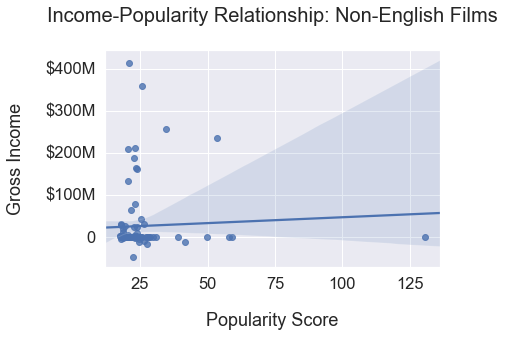

In [53]:
pop_net_non_eng = ne_df
sns.set(font_scale=1.5)
fig,ax = plt.subplots()
# use the function regplot to make a scatterplot
sns.regplot(x=pop_net_non_eng["popularity"], y=pop_net_non_eng["gross_income"], ax=ax, marker='o')

plt.xlabel('Popularity Score',labelpad=20)
plt.ylabel('Gross Income',labelpad=20)
plt.title('Income-Popularity Relationship: Non-English Films', y=1.1, fontsize=20)

#Removing the legend as I think it's unnecessary in this situation.
#ax.legend().set_visible(False)
ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

plt.show()

In [54]:
lang_money = newshaq.groupby(['original_language'])['gross_income'].sum().sort_values(ascending=False)
lang_money

original_language
en    173595718474
ja      1413786349
fr       568494062
ko       284288588
it       238373017
es       102247734
pt        27341770
de         5693721
id         3005187
cn         1555430
tl               0
hi               0
ml               0
fi               0
pl               0
cs               0
sv           -1200
uk        -3504863
ru       -27351562
Name: gross_income, dtype: int64

In [55]:
def cool_func_langs(row):

    num_of_langs = [l['name'] for l in row['spoken_languages']]
    letsgo = {}
    num_of_lang_list = []
    
    for i in num_of_langs:
        if i != '':
            letsgo[i] = 1
            
    return letsgo

In [56]:
lang_sum = newshaq.apply(lambda r: cool_func_langs(r), axis=1).to_list()
lang_sum

[{'English': 1, 'Português': 1},
 {'Pусский': 1},
 {'English': 1},
 {'English': 1, 'Português': 1, 'Français': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1, '日本語': 1, 'Français': 1},
 {'Română': 1, 'English': 1, 'Deutsch': 1, 'Pусский': 1},
 {'English': 1},
 {'Español': 1, 'English': 1},
 {'English': 1, 'Italiano': 1, 'Pусский': 1, 'العربية': 1, 'Français': 1},
 {'English': 1, 'Italiano': 1},
 {'English': 1},
 {'Pусский': 1},
 {'English': 1},
 {'English': 1},
 {'日本語': 1},
 {'English': 1},
 {'English': 1},
 {'Český': 1, 'Nederlands': 1, 'English': 1, 'Deutsch': 1, 'Italiano': 1},
 {'English': 1, 'Deutsch': 1, '한국어/조선말': 1},
 {'English': 1, '普通话': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1},
 {'Français': 1},
 {'English': 1},
 {'English': 1},
 {'বাংলা': 1, 'English': 1, 'हिन्दी': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1, 'Norsk': 1},
 {'English': 1},
 {'English': 1},
 {'Engl

In [57]:
lang_sum_list = []
for l in lang_sum:
    lang_sum_list.append(len(l))

lang_sum_list

[2,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 4,
 1,
 2,
 5,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 3,
 3,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 3,
 0,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 3,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 5,
 3,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 8,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 6,
 1,
 1,
 1,
 1,
 4,
 2,
 2,
 2,
 1,
 2,
 2,
 3,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 4,
 1,
 2,
 2,
 1,
 1,
 0,
 1,
 1,


In [58]:
lang_sum_df_col = pd.DataFrame(lang_sum_list,columns=['number_of_languages'])
lang_sum_df_col

number_of_languages
0                      2
1                      1
2                      1
3                      3
4                      1
..                   ...
995                    1
996                    4
997                    2
998                    1
999                    1

[1000 rows x 1 columns]

In [59]:
major_df = pd.concat([newshaq, lang_sum_df_col], axis=1)
major_df.head()

adult                     backdrop_path belongs_to_collection  budget  \
0  False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg                  None       0   
1  False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg                  None       0   
2  False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg                  None       0   
3  False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg                  None       0   
4  False  /8PK4X8U3C79ilzIjNTkTgjmc4js.jpg                  None       0   

                                              genres  \
0  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
2  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
3  [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
4  [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...   

                                       homepage      id     imdb_id  \
0           http://www.netflix.com/projectpower  605116   tt7550000   
1  https://www.hypepro.tv/filmtv/video/sputnik1  594718  tt11905962   
2        https://www.netflix.com/title/81252403  726664   tt8675288   
3                                                703771  tt12876132   
4                                                521034   tt2702920   

  original_language                              original_title  \
0                en                               Project Power   
1                ru                                     Спутник   
2                en                                    Fearless   
3                en  Deathstroke: Knights & Dragons - The Movie   
4                en                           The Secret Garden   

                                            overview  popularity  \
0  An ex-soldier, a teen and a cop collide in New...     274.992   
1  At the height of the Cold War, a Soviet spacec...     130.557   
2  A teen gamer is forced to level up to full-tim...     117.131   
3  Ten years ago, Slade Wilson-aka the super-assa...     105.509   
4  Mary Lennox is born in India to wealthy Britis...      86.814   

                        poster_path  \
0  /bOKjzWDxiDkgEQznhzP4kdeAHNI.jpg   
1  /eAUzmhP54bE1vPXaY7FbuZREJlR.jpg   
2  /5oQJ6HeNGWnEtP9Qyt5IZjuKI7j.jpg   
3  /vFIHbiy55smzi50RmF8LQjmpGcx.jpg   
4   /5MSDwUcqnGodFTvtlLiLKK0XKS.jpg   

                                production_companies  \
0  [{'id': 102118, 'logo_path': None, 'name': 'Sc...   
1  [{'id': 100821, 'logo_path': None, 'name': 'Vo...   
2  [{'id': 81139, 'logo_path': None, 'name': 'Van...   
3  [{'id': 2785, 'logo_path': '/l5zW8jjmQOCx2dFmv...   
4  [{'id': 437, 'logo_path': '/nu20mtwbEIhUNnQ5NX...   

                                production_countries release_date  revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-14        0   
1           [{'iso_3166_1': 'RU', 'name': 'Russia'}]   2020-07-14        0   
2           [{'iso_3166_1': 'CA', 'name': 'Canada'}]   2020-08-14        0   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-04        0   
4  [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...   2020-07-08        0   

   runtime                                   spoken_languages    status  \
0    113.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
1    113.0           [{'iso_639_1': 'ru', 'name': 'Pусский'}]  Released   
2     89.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3     87.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
4     99.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  \
0  What would you risk for five minutes of pure p...   
1          The only survivor did not come back alone   
2                                                      
3  Never give a paid killer a reason to work for ...   
4                                                      

                                        title  video  vote_average  \
0                               Project Power  False           6.8   
1

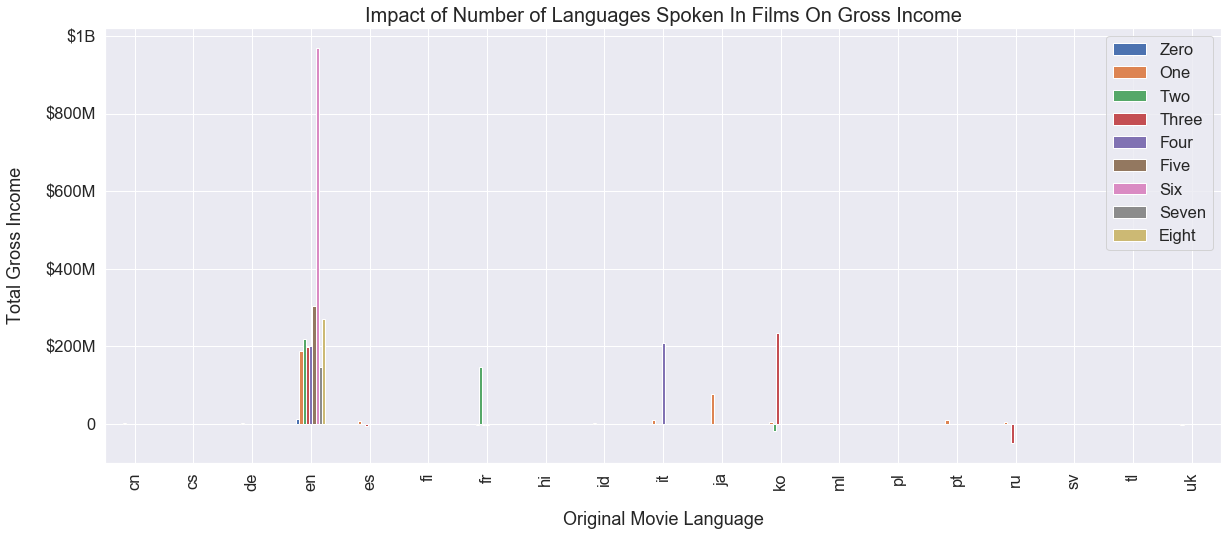

In [61]:
mdflang = major_df.groupby(['original_language','number_of_languages'])['gross_income'].mean().unstack()
mdflang = mdflang.where(pd.notnull(mdflang), None)
mdflang.columns = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight']

fig, ax = plt.subplots(figsize=(20,8))
mdflang.plot(kind='bar',ax=ax)


sns.set(font_scale=1.5)

plt.xlabel('Original Movie Language',labelpad=20)
plt.ylabel('Total Gross Income',labelpad=20)
plt.title('Impact of Number of Languages Spoken In Films On Gross Income', y=1.0, fontsize=20)

#Removing the legend as I think it's unnecessary in this situation.
ax.legend().set_visible(True)
ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))


plt.show()

## Takeaway #3: English Films With Many Languages Spoken In Film = $$$

What's clear from the data here is that -- over time -- the films which have English as their original language and <b>also</b> have other languages being spoken in the film are by and large the top earners.

We can even see that as the number of languages spoken in the originally-English-speaking films goes up, the net income goes up as well!

## 🧗🏿 🌍 👨🏿‍🚀 Fourth Question:

### How do films that belong to collections fare compared to films not apart of collections?

Now, what I'll do next is investigate films that are part of collections. I've noticed a decent amount of collections in the dataset and I'm curious how these films fare compared to the others.

In [62]:
#First, to look at the dataset again to refresh!
newshaq

adult                     backdrop_path  \
0    False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg   
1    False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg   
2    False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg   
3    False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg   
4    False  /8PK4X8U3C79ilzIjNTkTgjmc4js.jpg   
..     ...                               ...   
995  False  /fPcZY4N7tH0rtNmB6tFqZV8UN8M.jpg   
996  False  /fE7RqvVHbGHjBC9NjIjlLh2t4zK.jpg   
997  False  /gDRlw7GoA0OoLvijXNCTTdtAtNX.jpg   
998  False  /fnBW07T1FmCxrZDpRnlnMK3Urs3.jpg   
999  False  /f8BobrxGnAFObYRSN1BTIzQbEMW.jpg   

                                 belongs_to_collection    budget  \
0                                                 None         0   
1                                                 None         0   
2                                                 None         0   
3                                                 None         0   
4                                                 None         0   
..                                                 ...       ...   
995  {'id': 98430, 'name': 'Feast Collection', 'pos...   3200000   
996  {'id': 31562, 'name': 'The Bourne Collection',...  75000000   
997  {'id': 126125, 'name': 'The Expendables Collec...  80000000   
998  {'id': 299748, 'name': 'Walking Tall (Reboot) ...  56000000   
999  {'id': 87236, 'name': 'Mulan Collection', 'pos...         0   

                                                genres  \
0    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1    [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
2    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
3    [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
4    [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...   
..                                                 ...   
995  [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...   
996  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
997  [{'id': 53, 'name': 'Thriller'}, {'id': 12, 'n...   
998  [{'id': 12, 'name': 'Adventure'}, {'id': 18, '...   
999  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   

                                             homepage      id     imdb_id  \
0                 http://www.netflix.com/projectpower  605116   tt7550000   
1        https://www.hypepro.tv/filmtv/video/sputnik1  594718  tt11905962   
2              https://www.netflix.com/title/81252403  726664   tt8675288   
3                                                      703771  tt12876132   
4                                                      521034   tt2702920   
..                                                ...     ...         ...   
995                       http://www.feast-movie.com/   10070   tt0426459   
996  https://www.uphe.com/movies/the-bourne-supremacy    2502   tt0372183   
997                   http://expendablesthemovie.com/   27578   tt1320253   
998                                                     11358   tt0351977   
999                                                     12242   tt0279967   

    original_language                              original_title  \
0                  en                               Project Power   
1                  ru                                     Спутник   
2                  en                                    Fearless   
3                  en  Deathstroke: Knights & Dragons - The Movie   
4                  en                           The Secret Garden   
..                ...                                         ...   
995                en                                       Feast   
996                en                        The Bourne Supremacy   
997                en                             The Expendables   
998                en                                Walking Tall   
999                en                                    Mulan II   

                                              overview  popularity  \
0    An ex-soldier, a teen and a cop collide in New...     274.992   
1    At the height o

In [63]:
newshaq_sum = newshaq.loc[:,['belongs_to_collection','gross_income','original_language','vote_average','vote_count']].sort_values(by='gross_income', ascending=False)
newshaq_sum

belongs_to_collection  gross_income  \
90   {'id': 87096, 'name': 'Avatar Collection', 'po...    2550965087   
81   {'id': 86311, 'name': 'The Avengers Collection...    2441800564   
210                                               None    1987463944   
182  {'id': 10, 'name': 'Star Wars Collection', 'po...    1823223624   
8    {'id': 86311, 'name': 'The Avengers Collection...    1746239637   
..                                                 ...           ...   
257                                               None    -151000000   
802                                               None    -175000000   
56                                                None    -200000000   
15                                                None    -205000000   
938  {'id': 645, 'name': 'James Bond Collection', '...    -242000000   

    original_language  vote_average  vote_count  
90                 en           7.4       21865  
81                 en           8.3       14644  
210                en           7.9       17529  
182                en           7.4       14818  
8                  en           8.3       19358  
..                ...           ...         ...  
257                en           7.7        3860  
802                en           6.6        1842  
56                 en           0.0           0  
15                 en           2.0           1  
938                en           0.0           0  

[1000 rows x 5 columns]

In [64]:
newshaq_less = newshaq.dropna(subset = ['belongs_to_collection','poster_path'])
newshaq_less = newshaq_less.loc[:,['belongs_to_collection','gross_income','original_language','vote_average','vote_count']].sort_values(by='gross_income', ascending=False)
newshaq_less

belongs_to_collection  gross_income  \
90   {'id': 87096, 'name': 'Avatar Collection', 'po...    2550965087   
81   {'id': 86311, 'name': 'The Avengers Collection...    2441800564   
182  {'id': 10, 'name': 'Star Wars Collection', 'po...    1823223624   
8    {'id': 86311, 'name': 'The Avengers Collection...    1746239637   
196  {'id': 328, 'name': 'Jurassic Park Collection'...    1521713208   
..                                                 ...           ...   
379  {'id': 731067, 'name': 'Bird Box Collection', ...     -19800000   
214  {'id': 135179, 'name': 'Sin City Collection', ...     -25592384   
455  {'id': 428046, 'name': 'Viy Collection', 'post...     -49000000   
661  {'id': 497697, 'name': 'Bright Collection', 'p...     -90000000   
938  {'id': 645, 'name': 'James Bond Collection', '...    -242000000   

    original_language  vote_average  vote_count  
90                 en           7.4       21865  
81                 en           8.3       14644  
182                en           7.4       14818  
8                  en           8.3       19358  
196                en           6.6       15902  
..                ...           ...         ...  
379                en           6.9        6790  
214                en           6.3        2696  
455                ru           6.2         147  
661                en           6.2        4032  
938                en           0.0           0  

[356 rows x 5 columns]

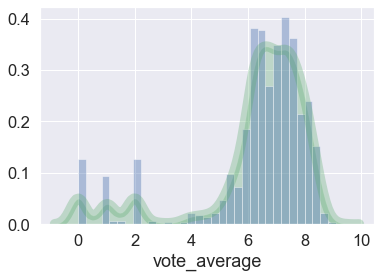

In [65]:
sns.distplot(a = newshaq_sum["vote_average"], kde=True,
kde_kws={"color": "g", "alpha":0.3, "linewidth": 10, "shade":True })

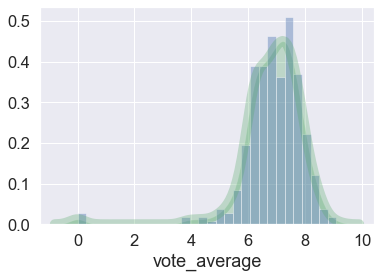

In [66]:
sns.distplot(a = newshaq_less["vote_average"], kde=True,
kde_kws={"color": "g", "alpha":0.3, "linewidth": 10, "shade":True })

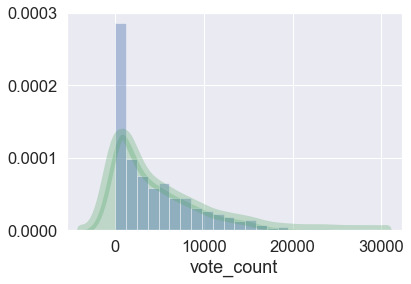

In [67]:
sns.distplot(a = newshaq_sum["vote_count"], kde=True,
kde_kws={"color": "g", "alpha":0.3, "linewidth": 10, "shade":True })

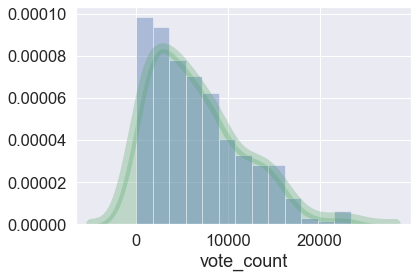

In [68]:
sns.distplot(a = newshaq_less["vote_count"], kde=True,
kde_kws={"color": "g", "alpha":0.3, "linewidth": 10, "shade":True })

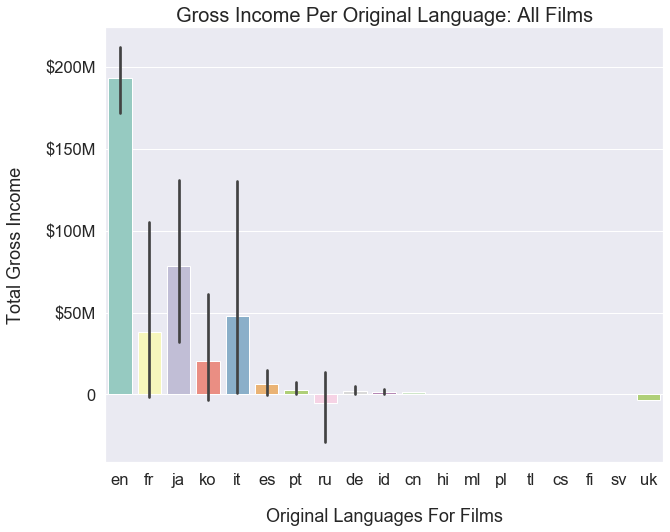

In [69]:
fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(x="original_language", y="gross_income", data=newshaq_sum, palette="Set3",ax=ax)

sns.set(font_scale=1.5)

plt.xlabel('Original Languages For Films',labelpad=20)
plt.ylabel('Total Gross Income',labelpad=20)
plt.title('Gross Income Per Original Language: All Films', y=1.0, fontsize=20)

ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

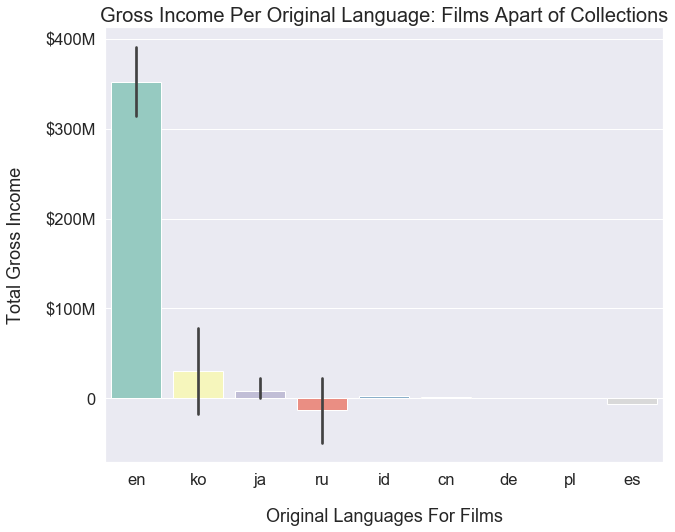

In [70]:
fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(x="original_language", y="gross_income", data=newshaq_less, palette="Set3",ax=ax)

sns.set(font_scale=1.5)

plt.xlabel('Original Languages For Films',labelpad=20)
plt.ylabel('Total Gross Income',labelpad=20)
plt.title('Gross Income Per Original Language: Films Apart of Collections', y=1.0, fontsize=20)

ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

In [71]:
newshaq_sum_2 = newshaq.loc[:,['belongs_to_collection','gross_income']].sort_values(by='gross_income', ascending=False).sum()
newshaq_sum_2

gross_income    176209646707
dtype: int64

In [72]:
newshaq_less = newshaq.dropna(subset = ['belongs_to_collection','poster_path'])
newshaq_less_2 = newshaq_less.loc[:,['belongs_to_collection','gross_income']].sort_values(by='gross_income', ascending=False).sum()
newshaq_less_2

gross_income    120544001778
dtype: int64

In [74]:
collections_diff = sum(newshaq_sum_2) - sum(newshaq_less_2)
print(f'Total gross income without films apart of a collection included is: ${float(collections_diff)}')
print('That is north of $55 billion USD')

Total gross income without films apart of a collection included is: $55665644929.0
That is north of $55 billion USD


In [75]:
collections_makeup = newshaq_less_2 / newshaq_sum_2
print(f'Films apart of collections makeup {float(collections_makeup)} of the total gross income!')
print('That is more than 2/3!')

Films apart of collections makeup 0.6840942254338641 of the total gross income!
That is more than 2/3!


## Takeaway #4: Collections Make Sense...As Long As They Are English-Speaking?

It's pretty interesting to see that films apart of collections account for such a large portion of the income. But, this isn't surprising, either. All in all, the voting averages are similar, with a bit of a nod towards films apart of collections.

---

## 🧗🏿 🌍 👨🏿‍🚀 Increase To 3000 Titles: A Comparison

To end, I'll use the API to access TMDb once more, but this time I'll retrieve 3000 titles, and then what I'd like to do is do some comparative analysis to see if the one trend matches or is similar with those I discovered for the 1000 titles!

In [76]:
three_k = []

for i in (range(1,151)):
    if i%15 == 0:
        time.sleep(7)
    doop = a.popular(page=i)['results']
    three_k.extend(doop)

print(doop[1]['title'])
print(three_k[1]['title'])
len(three_k)

The Skin I Live In
Sputnik


3000

In [77]:
three_k_ids = []
for i in three_k:
    three_k_ids.append(i['id'])
print(three_k_ids[0:20])

[605116, 594718, 726664, 703771, 521034, 454433, 385103, 475557, 299536, 27205, 271110, 612706, 531499, 547016, 659991, 577922, 430155, 517412, 579583, 390635]


In [78]:
print(three_k[5]['id'])
print(len(three_k_ids))

454433
3000


In [79]:
three_k_df = []

for k in three_k_ids:
    movie = tmdb.Movies(k)
    response = movie.info()
    three_k_df.append(response)

In [80]:
len(three_k_df)

3000

In [81]:
three_df = pd.DataFrame(three_k_df)
three_df

adult                     backdrop_path  \
0     False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg   
1     False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg   
2     False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg   
3     False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg   
4     False  /8PK4X8U3C79ilzIjNTkTgjmc4js.jpg   
...     ...                               ...   
2995  False  /ftTmFUSdxingTzpaZG0gX2gBgg4.jpg   
2996  False  /8wI0M7HDHhDsoxMCkcAVUx7O6DX.jpg   
2997  False  /owcItC6oovy4JhYJ3tmwmeVSjPB.jpg   
2998  False  /3xJFFU3YF9WcpK2WXDF15zVcSQZ.jpg   
2999  False  /fynGPtLcobYqBIPTeKIxW8tNvjo.jpg   

                                  belongs_to_collection    budget  \
0                                                  None         0   
1                                                  None         0   
2                                                  None         0   
3                                                  None         0   
4                                                  None         0   
...                                                 ...       ...   
2995  {'id': 86024, 'name': 'Legally Blonde Collecti...  18000000   
2996                                               None  38000000   
2997                                               None         0   
2998                                               None  30000000   
2999                                               None   4000000   

                                                 genres  \
0     [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1     [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
2     [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
3     [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
4     [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...   
...                                                 ...   
2995                     [{'id': 35, 'name': 'Comedy'}]   
2996  [{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...   
2997  [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...   
2998  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2999  [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...   

                                          homepage      id     imdb_id  \
0              http://www.netflix.com/projectpower  605116   tt7550000   
1     https://www.hypepro.tv/filmtv/video/sputnik1  594718  tt11905962   
2           https://www.netflix.com/title/81252403  726664   tt8675288   
3                                                   703771  tt12876132   
4                                                   521034   tt2702920   
...                                            ...     ...         ...   
2995                                                  8835   tt0250494   
2996             http://www.onlythebrave-movie.com  395991   tt3829920   
2997                        http://enemy-movie.com  181886   tt2316411   
2998                                                  4967   tt0171433   
2999                                                 81446   tt1836944   

     original_language                              original_title  \
0                   en                               Project Power   
1                   ru                                     Спутник   
2                   en                                    Fearless   
3                   en  Deathstroke: Knights & Dragons - The Movie   
4                   en                           The Secret Garden   
...                ...                                         ...   
2995                en                              Legally Blonde   
2996                en                              Only the Brave   
2997                en                                       Enemy   
2998                en                           Keeping the Faith   
2999                en                         The Baytown Outlaws   

                                               overview  popularity  \
0     An ex-soldier, a teen and a cop collide in New...     274.992   
1     A

In [ ]:
# Gross income top production companies

In [82]:
three_df['gross_income'] = (three_df.loc[:,'revenue'] - three_df.loc[:,'budget'])
three_df['gross_income'] = three_df['gross_income'].astype('int64')
three_df

adult                     backdrop_path  \
0     False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg   
1     False  /mBbA77FyzhU0Tz9tmbKG8heGmh3.jpg   
2     False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg   
3     False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg   
4     False  /8PK4X8U3C79ilzIjNTkTgjmc4js.jpg   
...     ...                               ...   
2995  False  /ftTmFUSdxingTzpaZG0gX2gBgg4.jpg   
2996  False  /8wI0M7HDHhDsoxMCkcAVUx7O6DX.jpg   
2997  False  /owcItC6oovy4JhYJ3tmwmeVSjPB.jpg   
2998  False  /3xJFFU3YF9WcpK2WXDF15zVcSQZ.jpg   
2999  False  /fynGPtLcobYqBIPTeKIxW8tNvjo.jpg   

                                  belongs_to_collection    budget  \
0                                                  None         0   
1                                                  None         0   
2                                                  None         0   
3                                                  None         0   
4                                                  None         0   
...                                                 ...       ...   
2995  {'id': 86024, 'name': 'Legally Blonde Collecti...  18000000   
2996                                               None  38000000   
2997                                               None         0   
2998                                               None  30000000   
2999                                               None   4000000   

                                                 genres  \
0     [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1     [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
2     [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
3     [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
4     [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...   
...                                                 ...   
2995                     [{'id': 35, 'name': 'Comedy'}]   
2996  [{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...   
2997  [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...   
2998  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2999  [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...   

                                          homepage      id     imdb_id  \
0              http://www.netflix.com/projectpower  605116   tt7550000   
1     https://www.hypepro.tv/filmtv/video/sputnik1  594718  tt11905962   
2           https://www.netflix.com/title/81252403  726664   tt8675288   
3                                                   703771  tt12876132   
4                                                   521034   tt2702920   
...                                            ...     ...         ...   
2995                                                  8835   tt0250494   
2996             http://www.onlythebrave-movie.com  395991   tt3829920   
2997                        http://enemy-movie.com  181886   tt2316411   
2998                                                  4967   tt0171433   
2999                                                 81446   tt1836944   

     original_language                              original_title  \
0                   en                               Project Power   
1                   ru                                     Спутник   
2                   en                                    Fearless   
3                   en  Deathstroke: Knights & Dragons - The Movie   
4                   en                           The Secret Garden   
...                ...                                         ...   
2995                en                              Legally Blonde   
2996                en                              Only the Brave   
2997                en                                       Enemy   
2998                en                           Keeping the Faith   
2999                en                         The Baytown Outlaws   

                                               overview  popularity  \
0     An ex-soldier, a teen and a cop collide in New...     274.992   
1     A

In [83]:
three_df_simpl = three_df.loc[:,['title','popularity','belongs_to_collection','original_language','gross_income']].sort_values(by=['gross_income'],ascending=False)
three_df_simpl

title  popularity  \
90                          Avatar      35.101   
81               Avengers: Endgame      36.351   
210                        Titanic      28.230   
182   Star Wars: The Force Awakens      29.186   
8           Avengers: Infinity War      77.294   
...                            ...         ...   
1467               The Lone Ranger      15.786   
802   Mowgli: Legend of the Jungle      18.686   
56                           Mulan      41.633   
15                           Tenet      60.150   
938                 No Time to Die      17.844   

                                  belongs_to_collection original_language  \
90    {'id': 87096, 'name': 'Avatar Collection', 'po...                en   
81    {'id': 86311, 'name': 'The Avengers Collection...                en   
210                                                None                en   
182   {'id': 10, 'name': 'Star Wars Collection', 'po...                en   
8     {'id': 86311, 'name': 'The Avengers Collection...                en   
...                                                 ...               ...   
1467                                               None                en   
802                                                None                en   
56                                                 None                en   
15                                                 None                en   
938   {'id': 645, 'name': 'James Bond Collection', '...                en   

      gross_income  
90      2550965087  
81      2441800564  
210     1987463944  
182     1823223624  
8       1746239637  
...            ...  
1467    -165710090  
802     -175000000  
56      -200000000  
15      -205000000  
938     -242000000  

[3000 rows x 5 columns]

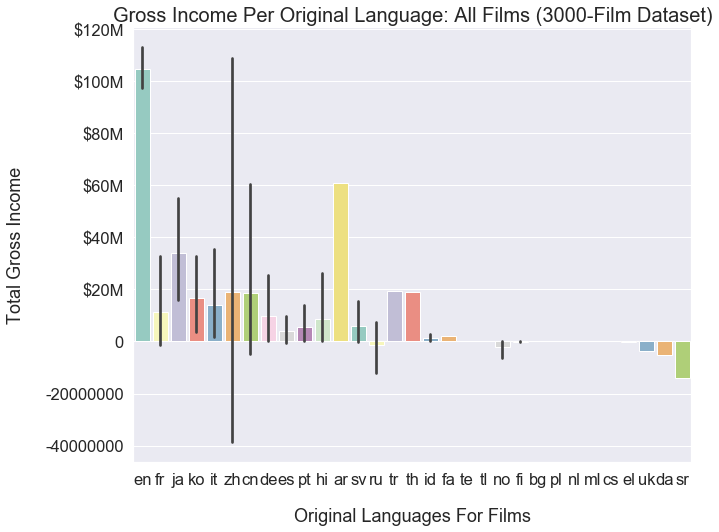

In [84]:
fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(x="original_language", y="gross_income", data=three_df_simpl, palette="Set3",ax=ax)

sns.set(font_scale=1.5)

plt.xlabel('Original Languages For Films',labelpad=20)
plt.ylabel('Total Gross Income',labelpad=20)
plt.title('Gross Income Per Original Language: All Films (3000-Film Dataset)', y=1.0, fontsize=20)

ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

## 🧗🏿 🌍 👨🏿‍🚀 Summary + Recommendations:

1. Consider producing films that are or could be apart of collections.
2. Produce films that consist of at least 4 languages being spoken in the film.
3. Invest in the production of films whose original language is Slovenian, Korean or Japanese.
4. Go with action, drama or thriller film production.
5. Take on potentially polarizing film productions (while adhering to other recommendations).

### Further Research To Consider:

1. Getting insight into what films are currently in production and comparing details with the history of production company investment and film performance.
2. How do metrics like "popularity" and "vote count" relate to the potential amount of time a customer would spend within a streaming / online movie watching platform? And, how would gaining this "consumer attention" translate to cash inflow in other areas?

In [94]:
practice_df = pd.DataFrame(three_df_simpl)
practice_df

title  popularity  \
90                          Avatar      35.101   
81               Avengers: Endgame      36.351   
210                        Titanic      28.230   
182   Star Wars: The Force Awakens      29.186   
8           Avengers: Infinity War      77.294   
...                            ...         ...   
1467               The Lone Ranger      15.786   
802   Mowgli: Legend of the Jungle      18.686   
56                           Mulan      41.633   
15                           Tenet      60.150   
938                 No Time to Die      17.844   

                                  belongs_to_collection original_language  \
90    {'id': 87096, 'name': 'Avatar Collection', 'po...                en   
81    {'id': 86311, 'name': 'The Avengers Collection...                en   
210                                                None                en   
182   {'id': 10, 'name': 'Star Wars Collection', 'po...                en   
8     {'id': 86311, 'name': 'The Avengers Collection...                en   
...                                                 ...               ...   
1467                                               None                en   
802                                                None                en   
56                                                 None                en   
15                                                 None                en   
938   {'id': 645, 'name': 'James Bond Collection', '...                en   

      gross_income  
90      2550965087  
81      2441800564  
210     1987463944  
182     1823223624  
8       1746239637  
...            ...  
1467    -165710090  
802     -175000000  
56      -200000000  
15      -205000000  
938     -242000000  

[3000 rows x 5 columns]

In [113]:
btc_list = [i['name'] for i in practice_df['belongs_to_collection'] if i != None]
btc_list

['Avatar Collection',
 'The Avengers Collection',
 'Star Wars Collection',
 'The Avengers Collection',
 'Jurassic Park Collection',
 'The Fast and the Furious Collection',
 'Frozen Collection',
 'The Avengers Collection',
 'Harry Potter Collection',
 'The Avengers Collection',
 'Jurassic Park Collection',
 'Star Wars Collection',
 'Frozen Collection',
 'The Incredibles Collection',
 'The Lord of the Rings Collection',
 'Iron Man Collection',
 'The Fast and the Furious Collection',
 'Aquaman Collection',
 'Captain Marvel Collection',
 'Spider-Man (Avengers) Collection',
 'Despicable Me Collection',
 'James Bond Collection',
 'Captain America Collection',
 'Toy Story Collection',
 'Despicable Me Collection',
 'Transformers Collection',
 'Jumanji Collection',
 'Toy Story Collection',
 'Pirates of the Caribbean Collection',
 'Jurassic Park Collection',
 'Harry Potter Collection',
 'The Lord of the Rings Collection',
 'Finding Nemo Collection',
 'The Dark Knight Collection',
 'Finding Nemo 